<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-mls-project/master/img/GMITLOGO.jpg" width="750"/></p>

# GMIT, H.Dip in Data Analytics, Machine Learning and Statistics Project 2019

## 1. Introduction

This repository contains all of the files pertaining to my 2019 project submission for the Machine Learning and Statistics module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of an 8 week period in October and November 2019. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective 

The objective of the project concerns the well known *Boston House Prices Dataset*. This is a dataset that contains data that was collected by the U.S. census service in the 1970s[2]. The goal of this project is to analyse this dataset in order to demonstrate proficiency and understanding of many statistical and machine learning concepts. The aim is to use some Python[3] packages such as scipy[4], Jupyter, and keras[5] to gain some insight from the data. For the purpose of assessment the project is broken down into 3 sections as follows:

* **Describe:** In this part of the project, the dataset will be imported into this Jupyter notebook and analysed using descriptive statistics and plots.  
* **Infer:** In this part inferential statistics will be used to investigate the effect that proximity to the Charles river has on median house prices.  
* **Predict:** In this part of the project the dataset will be used to train a neural network that can be used for predicting house prices based on the other data in the dataset.   

<p align="center">
  <img src="img/boston-houses.png" width="750"/>
<div align='center' style='font-size:12px'> <b><i>Boston Houses</i></b></div>  
</p>
  

### 1.2 Project Plan

The plan for this project is as follows:

* In Section 2 the dataset will be loaded and analysed using descriptive statistics. The plan will be to look at the relationships between the different data features rather than each data feature on its own. Where there is a strong relationship between features this will be discussed and analysed further.
* In Section 3 the dataset is to be analysed again to see is there is a statistically significant difference between the median house price in areas along the Charles river, versus those which are not. The focus here will be on selecting an appropriate test for significance. 
* In Section 4 a neural network will be trained using the data in the dataset to try and predict a house price based on other inputs. The neural network will then be evaluated for accuracy and then refined to try and improve it. 
* In the Section 5 the project will be concluded and the relative success of the project will be discussed.

## 2. Describe the Boston Housing Dataset

### 2.1 Introduction to the Boston Housing Price Dataset

The Boston Housing dataset was collected by the US census service in the 1970s. It was first published in 1978 by David Harrison and Daniel Rubinfield in their paper *Hedonic Housing Prices and Demand for Clean Air*[6]. In their study they investigated the possibility of using housing data to see if there was a market demand to pay for clean air. By analysing data about the desirability of individual suburbs in the Boston area, they estimated how willing people were to pay for air quality improvements. They found that minor air pollution damages were found to increase with the level of air pollution and levels of household income.

Since its initial publication it has become a useful dataset in the teaching of statistical modeling and machine learning. There are many reasons for this including:
* It is a a manageable size - there are 506 data points in it - each with 14 features (columns of data measurements).
* There are some interesting relationships between the different features which are worthy of analysis and discussion
* It is a good dataset for demonstrating regression and multivariate statistics.
* It is a real dataset representing a real phenomenon and therefore it is quite interesting fro students to analyse.

### 2.2 Loading the Dataset

In this section, the required Python libraries for the project will be imported. These include:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`
* `scipy`
*  
*    
Once the libraries are imported, we will the load the dataset using the `sklearn` package. 

#### 2.2.1 Importing the libraries

In [43]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# keras and tensorflow for machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

#### 2.2.2 Loading the dataset from sklearn

In the next block of code we will load the dataset. Note that `sklearn`[7] is a machine learning package for Python. 
In supervised machine learning it is common to divide the data set into model inputs (data) and model outputs (targets)[8]. As the Boston housing dataset is commonly used for regression problems required to predict housing prices, `sklearn` predefines the house prices feature as a target. We have to add this back into data set.

In [44]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
boston_house_prices = load_boston()

# create a dataframe with the data from the dataset
df = pd.DataFrame(boston_house_prices.data, columns=boston_house_prices.feature_names)

# add the median value to the dataframe
df["MEDV"] = boston_house_prices.target

# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset has 14 different columns of data as can be seen above. We can determine the number of rows using the `shape` function

In [45]:
# check the shape of the dataset
df.shape

(506, 14)

This confirms that the dataset has 506 different data points each with 14 columns of data points. The next step is to try and understand what the different columns such as **CRIM**, **ZN**, **INDUS** etc. mean. Luckily there is a handy function in sklearn for this (DESCR). The output of this function contains much detail on the dataset including the following information on the columns names:

* __CRIM__     per capita crime rate by town
* __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
* __INDUS__    proportion of non-retail business acres per town
* __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX__      nitric oxides concentration (parts per 10 million)
* __RM__       average number of rooms per dwelling
* __AGE__      proportion of owner-occupied units built prior to 1940
* __DIS__      weighted distances to five Boston employment centres
* __RAD__      index of accessibility to radial highways
* __TAX__      full-value property-tax rate per \$10,000
* __PTRATIO__  pupil-teacher ratio by town
* __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* __LSTAT__    % lower status of the population
* __MEDV__     Median value of owner-occupied homes in $1000's

So, it can be seen that the dataset contains a good mix of variables covering socioeconomic factors (such as house prices, property tax rates, pupil teacher ratio in the schools, crime rates) as well as locational factors (such as proximity to Charles river, accessibility to highways) ans environmental factors (such as NOX levels). In the next section we will begin to anaylse the data to see what it tells us.

### 2.3 Analysis of the Dataset 

A good place to start when carrying out exploratory data analysis is to use the pandas `describe()` function to get a feel for the columns in the data set.

In [46]:
# describe the dataset
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The output of this is a grid of data summarising the data and it will be useful to refer back to later. There are many options available to us when it comes to analysing this data - we could plot histograms of every column in the set and discuss each feature in turn, but a much more interesting approach is for us to explore the relationships between the features in the dataset to determine if there is any correlation between them.  

One way looking at the relationships between the data would be to plot scatterplots of some of the features against each other to see if there is any obvious relationship between them. The methodology works like this:
* Choose 2 features that you believe to be related
* Plot them against each other using a scatterplot
* Draw the best fit line
* Calculate the correlation co-efficient to determine how well the best-fit line fits the data
an example of this is shown below:

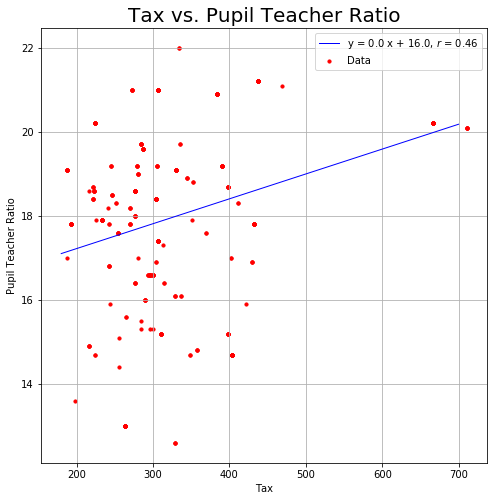

In [47]:
# Resize the plots
plt.rcParams['figure.figsize'] = [8, 8]
# Plot Crime Rate vs. Pupil Teacher Ratio
plt.scatter(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'],c='red', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'])
line_x = np.arange(180, 700, 0.1)
line_y = slope*line_x + intercept

# Plot the best fit line
plt.plot(line_x, line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
plt.title("Tax vs. Pupil Teacher Ratio", size="20")
plt.xlabel("Tax")
plt.ylabel("Pupil Teacher Ratio")
plt.legend()
plt.grid(True)
plt.show()

r (the correlation co-efficient or Pearson's co-efficient) can have a value of between -1 an 1, where values close to 0 indicate a poor fit, values close to 1 indicate a good fit and a positive correlation and values close to -1 indicate a good fit and a negative correlation. The correlation co-efficient (r) that we have calculated above is 0.46. This indicates a poor correlation (this can also be seen by the wide scatter of the data points).

The approach of selecting features ans plotting them against one another can work in a situation where are a few features in a set, or when the analyst has a good idea in advance of what variables might be influencing each other. 

For a dataset like the boston housing set, where there are 14 different features, ans the analyst (me!) is not sure of the relationships - we can use a pandas function to create a correlation matrix. This will give us all of the r values for each pair of data points so we can determine which ones merit further analysis.

#### 2.3.1 Creating the Correlation Matrix and Plotting a Heatmap

In this section we will use python to calculate the correlation matrix and visulaise it with a heatmap using the seaborn library. We will then analyse this heatmap to see if it throws up anything interesting.

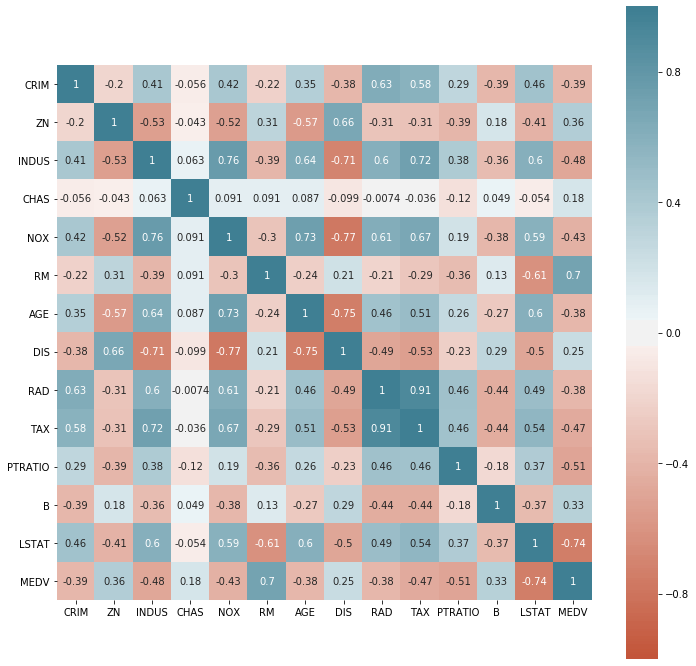

In [48]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 12]

# define the correlation matrix between the data columns in the set
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr = df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

#### 2.3.2 Anaylsing the Heat Map

In order to analyse the heat map, we must first determine what a suitable minimum value for r determines a relatively good correlation between a pair of data features. According to the Wikipedia entry for <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation co-efficient</a>[9], several authors have criteria for interpreting this statistic, however most of them are in may ways arbitrary. For example, if somebody was trying to verify <a href="https://en.wikipedia.org/wiki/Ohm%27s_law">Ohm's Law</a>[10] by increasing the voltage in an electrical circuit and measuring the corresponding current. If a scatter plot of this was completed and the correspond r-value calculated, it would be expected (if the electrical components and meters used in the experiment were of high quality) that this r-value would be very close to 1. However, in other field such as social sciences whether is much more noise, and the data generally only give a probability that a relationship between variables is likely, lower values of r are accepted as proof of a good correlation. 

The Boston Housing dataset is very much one from the social sciences. Any relationships between variables are likely to give an impression of the overall trend without being completely precise. For this reason I have chosen to analyse deeper any relationships that have correlation co-efficient of 0.65 or higher (-0.65 or lower for negative correlation!).

A summary of these relationships is listed below:

* The  proportion of residential land zoned for lots over 25,000 sq.ft. is positively correlated with the weighted distances to five Boston employment centres, in other words areas which have larger residential properties are further from the places where most of the jobs are.
* The proportion of non-retail business acres per town is positively correlated to  nitric oxides concentration in the air. This is what would be expected - areas with more industry are likely to burn more fossil fuels.
* The proportion of non-retail business acres per town is also positively correlated to full-value property-tax rate per \$10,000. In other words, areas with more industry tend to have higher property tax returns. Again, this is to be expected.
* The nitric oxide levels are are:
    * Positively correlated to proportion of owner-occupied units built prior to 1940 and full-value property-tax rate per \$10,000
    * Negatively correlated to weighted distances to five Boston employment centers  
    
    This seems to indicate that NOX levels are higher in older areas of the town, where property tax rates are higher
    (more industrial areas), that are shorter distances to the major employment ares. Again this is very much in line
    with what would be expected.
* The average number of rooms per dwelling is positively correlated with the median value of properties in an area. This would be expected - larger properties would be expected to be more expensive.
* The proportion of owner-occupied units built prior to 1940 is negatively correlated to the weighted distances to five Boston employment centers. This means that the older houses are nearer the employment centers (which are the areas with the nigher NOX levels and higher non-retail industry)
* THe index of accessibility to radial highways is positively correlated to the property tax rate. In other words, areas with better transport links (especially for using a private automobile) have higher property tax rates.
* Finally, the % lower status of the population is negatively correlated to the median property value in an area. This seems logical, a higher percentage of poorer people will be able to afford to buy property in areas where the property prices are lower


The initial analysis has given us some ideas to think about. The 2 main areas worthy of deeper analysis are as follows:
* Looking at how the average number of rooms per dwelling and percentage of lower status population are related to the median value of owner-occupied dwellings
* Considering the range of factors that seem to have an impact on NOX levels in the air such as property age, percentage of non-retail industry, distance to employment centers and percentage property tax.

The next analysis will be as follows:
* Create two new pandas dataframes one looking at each relationship
* Plot two new heat maps based on these new data frames
* Create two pair plots using the `seaborn` package to visualise these correlations

We will consider each point in turn

#### 2.3.3 Analysis of the median property value

The first step is to create a new dataframe with just the MEDV, RM and LSTAT columns in it.

In [49]:
# Create a new dataframe
medv_df = df[["MEDV", "RM", "LSTAT"]]
# Check the dataframe to ensure it looks right
medv_df.head()

,MEDV,RM,LSTAT
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33


Next we will re create the heat map with for `med_df`:

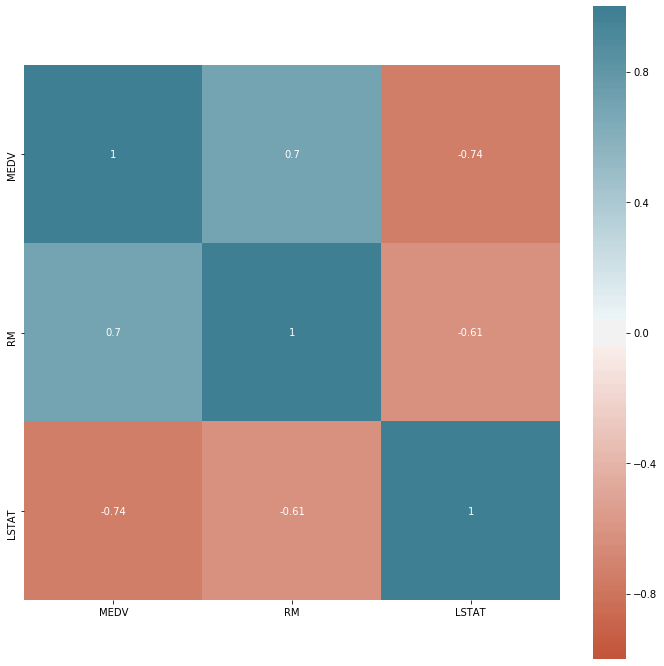

In [50]:
# define the correlation matrix between the data columns in the set
medv_corr = medv_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(medv_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

The next step is produce the pair plot to determine the overall shape of these relationships - i.e. are the relationships linear or perhaps a higher order polynomial might be more appropriate to describe the correlation.

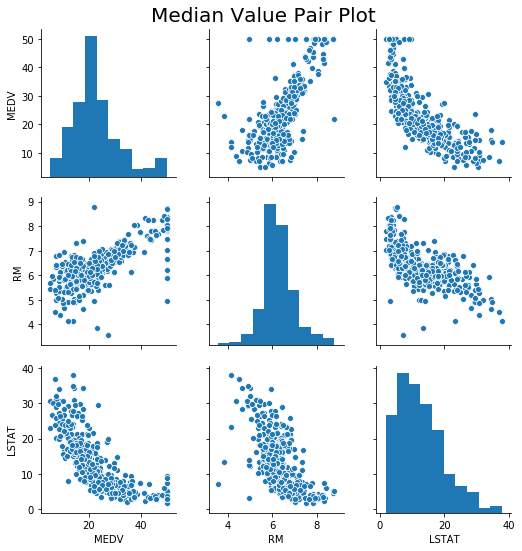

In [51]:
# pair plot to visualise the correlations
medv_pair_plt = sns.pairplot(medv_df)
medv_pair_plt.fig.suptitle("Median Value Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
When analysing a pair plot, I like to start on the diagonal, looking at the distribution of each feature:
* Median values are generally normally distributed - with some outliers for the higher values. The mean is about \$22k and there is a good spread
* Average no of rooms per dwelling is normally distributed with a mean of about 6 (6.28 from section 2.3 above) and not a very big spread (standard deviation is approx 0.7)
* % Lower status population is skewed left, with the most 10-15% being the most frequent (30-40 areas have 10-15% lower status population). There are some areas that have as many as 35% lower status population - though not many, 1 or 2 maximum.

Looking at the relationships between the data:
* Median value seems to be linearly related to the average number of rooms in the dwelling - we can use the `stats.linregress` function to determine the best fit line for this.
* The relationship between median value and \%lower status population is not linear - it is curved. We can use the `numpy.polyfit` function to analyse a quadratic function to see how it fits. 

The next step is to plot these relationships and calculate the best fit lines/curves.

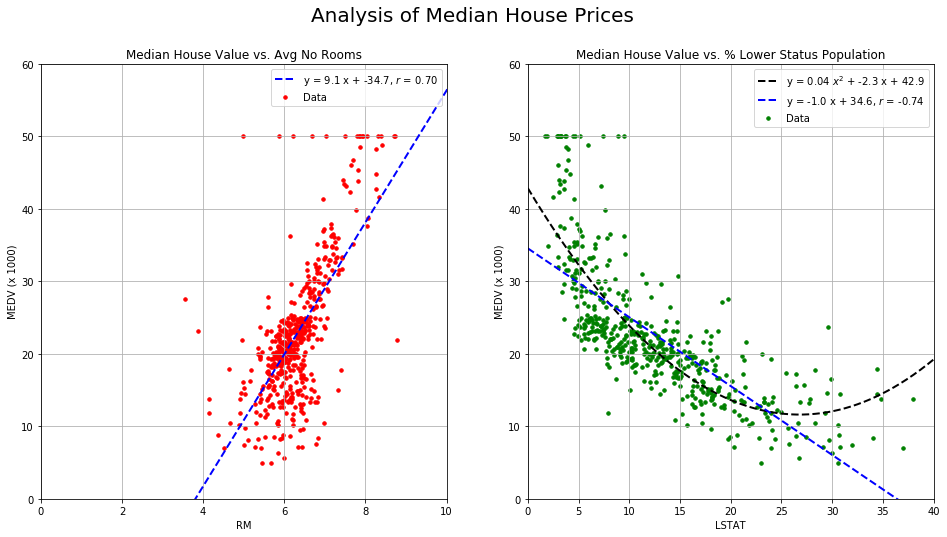

In [52]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot the Median Value against the Average no. of Rooms
ax1.scatter(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'])
# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_rm = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_rm = slope * x_rm + intercept
ax1.plot(x_rm, y_rm, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 60])
ax1.set_xlabel("RM")
ax1.set_ylabel("MEDV (x 1000)")
ax1.set_title('Median House Value vs. Avg No Rooms')
ax1.legend(loc="upper right")

# Plot the Median Value against the % Lower Status Population
ax2.scatter(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly = np.polyfit(medv_df.loc[:,'LSTAT'], medv_df.loc[:,'MEDV'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_lstat = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_lstat = slope * x_lstat + intercept
# Calculate y-values for the quadratic curve
y_poly = poly[0]*(x_lstat**2) + poly[1]*(x_lstat) + poly[2]
plt.plot(x_lstat, y_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly[0], poly[1], poly[2])) 

ax2.plot(x_lstat, y_lstat, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax2.set_xlabel("LSTAT")
ax2.set_ylabel("MEDV (x 1000)")
ax2.set_xlim([0, 40])
ax2.set_ylim([0, 60])
ax2.set_title('Median House Value vs. % Lower Status Population')
ax2.legend(loc="upper right")

plt.suptitle("Analysis of Median House Prices", size=20)
plt.show()

#### Median House Price Discussion

Even though this dataset was collected in the 1970's with a view to determining whether or not the general population of the Boston area is willing to pay for clean air [6], the dataset is commonly used by data analyst, statisticians and machine learning academics as a means of explaining some of the concepts involved in data analytics. In fact there are myriad blog posts online which use this dataset to illustrate a point - often using it as a way to demonstrate how to determine which relationships are important when training a machine learning algorithm [11], [12], [13], [14].

During the course of analysing the dataset we had determined that the there seemed to be a good linear correlation between house prices and number of rooms - this is intuitive as house with more rooms are likely to be bigger and hence worth more money. We have plotted the best fit line with the data, and this shows that there is a fairly linear relationship between the features as there is an equal spread of data points either side of the line and this condition holds true the entire length of the line. We have also determined the equation of the best fit line as $$ MEDV = 9.1*RM -34.7 $$, and this could be used to help determine the likely price of a house based on the numbers of rooms in it.

We have also considered the relationship between the % lower status population and median house price. The initial analysis hinted at a strong correlation but when it was plotted in the pair plot - it was obvious that the relationship was not linear. This was confirmed when this was plotted with the best fit line. It can be seen that all of the points that are below the line are clustered in the same region between x=5 and x=30. It is clear that a curve might make a better fit and the quadratic relationship between the variables was calculated and plotted. This can be seen to be a much better fit. Again the relationship can be modeled as $$MEDV = 0.04*LSTAT^2 -2.3*LSTAT + 42.9 $$. In the next section features which impact NOX levels will be analaysed.

#### 2.3.4 Analysis of NOX Levels

The first step is to create a new dataframe with the ZN, DIS, INDUS, NOX, TAX, AGE and RAD columns in it.

In [53]:
# Create a new dataframe
nox_df = df[["NOX", "DIS", "INDUS", "TAX", "AGE"]]
# Check the dataframe to ensure it looks right
nox_df.head()

,NOX,DIS,INDUS,TAX,AGE
0,0.538,4.0900,2.31,296.0,65.2
1,0.469,4.9671,7.07,242.0,78.9
2,0.469,4.9671,7.07,242.0,61.1
3,0.458,6.0622,2.18,222.0,45.8
4,0.458,6.0622,2.18,222.0,54.2


Next, we will create a heatmap of `nox_df`:

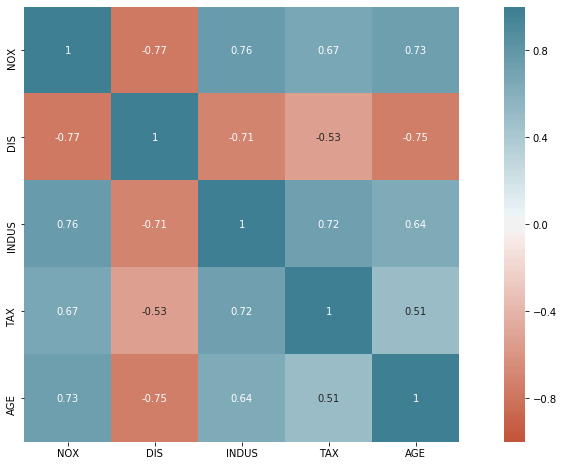

In [54]:
# define the correlation matrix between the data columns in the set
nox_corr = nox_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(nox_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Finally, we create a pair plot to visualise the relationships.

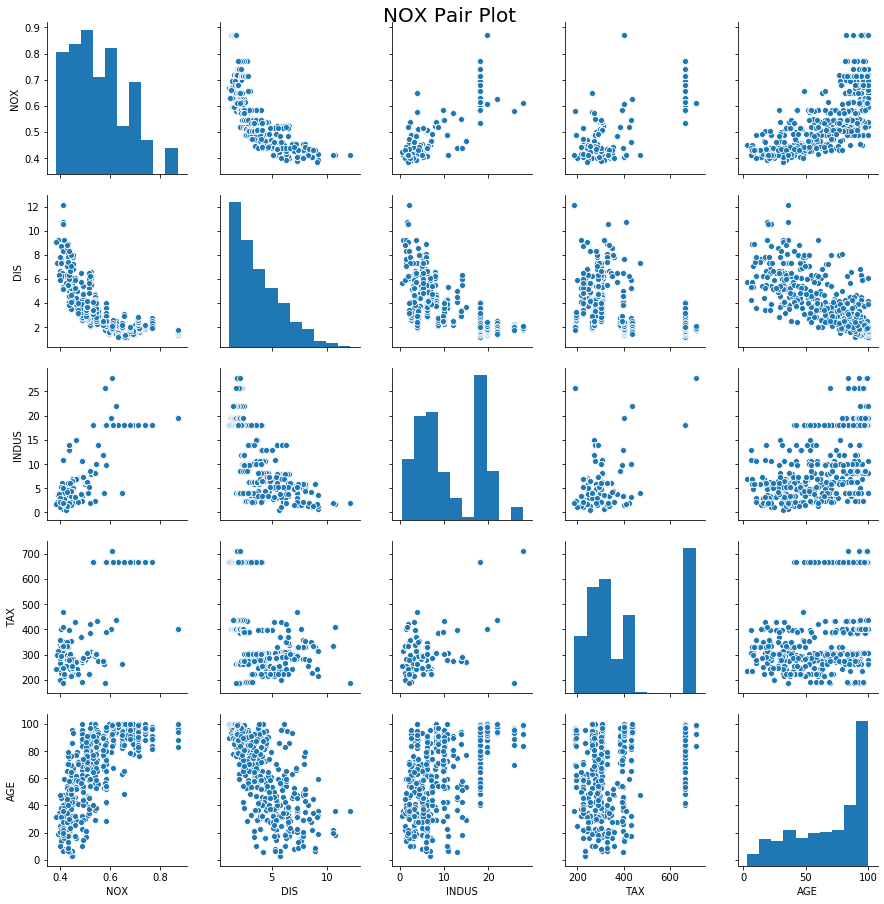

In [55]:
# pair plot to visualise the correlations
nox_pair_plt = sns.pairplot(nox_df)
nox_pair_plt.fig.suptitle("NOX Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
Again starting on the diagonal, looking at the distribution of each feature:
* NOX levels are skewed left - this means that most ares have lower levels of NOX in the air. As we consider higher NOX levels, there are fewer and fewer areas affected.
* The distance the the five employment centers is skewed left - residential properties tend to be near where the jobs are, as you move further away there are less housing areas.
* The distribution of non retail industries is bi-modal with a peak at about 7% and another at about 20%
* The percentage property tax seems to be somewhat normally distributed with some outliers at around 700.
* The proportion of properties built before 1940 of the properties is right skewed - there are more older houses than newer ones. It can be seen that there are a large number of areas that were built entirely before 1940.

Looking at the relationships between the data:
* The first thing to note is that even though some of these pairs of data features have reasonably high r-values - there does not seem to be a good relationship between them. We will only consider the strongly related pairs of data features for further analysis.
* NOX is strongly related to the distance to the five employment centers - the relationship is not linear so we can ue the `numpy.polyfit` function to determine a good model for it.
* The relationship between the NOX levels and the percentage of non retail industry is resonably linear - we can use `stats.liregress` to explore further.
* The relationship between NOX levels and proportion of properties built before 1940 is resonably goods but non-linear. We can explore with `numpy.polyfit`

IN the next part here I need to plot these 3 functions and determine the best line/curve

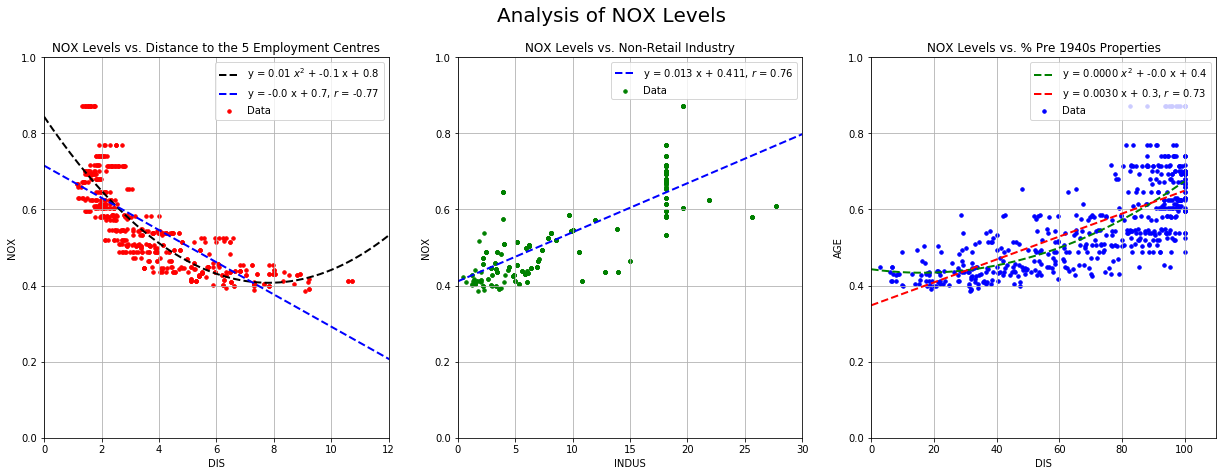

In [56]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2, ax3) = plt.subplots(1,3)

# Plot NOX against DIS
ax1.scatter(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
dis_slope, dis_intercept, dis_r_value, dis_p_value, dis_std_err = stats.linregress(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_dis = np.polyfit(nox_df.loc[:,'DIS'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_dis = np.arange(0,15.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_dis = dis_slope * x_dis + dis_intercept
# Calculate y-values for the quadratic curve
y_dis_poly = poly_dis[0]*(x_dis**2) + poly_dis[1]*(x_dis) + poly_dis[2]

# plot the best fit line and 2nd order polynomial
ax1.plot(x_dis, y_dis_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly_dis[0], poly_dis[1], poly_dis[2])) 
ax1.plot(x_dis, y_dis, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(dis_slope, dis_intercept, dis_r_value))
# format the ax1 plot
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel("DIS")
ax1.set_ylabel("NOX")
ax1.set_title('NOX Levels vs. Distance to the 5 Employment Centres')
ax1.legend(loc="upper right")

# Plot the NOX against INDUS
ax2.scatter(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
indus_slope, indus_intercept, indus_r_value, indus_p_value, indus_std_err = stats.linregress(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'])

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_indus = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_indus = indus_slope * x_indus + indus_intercept

# plot the best fit line
ax2.plot(x_indus, y_indus, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.3f x + %.3f, $r$ = %.2f'%(indus_slope, indus_intercept, indus_r_value))

# format the plot
ax2.set_xlabel("INDUS")
ax2.set_ylabel("NOX")
ax2.set_xlim([0, 30])
ax2.set_ylim([0, 1.0])
ax2.set_title('NOX Levels vs. Non-Retail Industry')
ax2.legend(loc="upper right")

# Plot NOX against AGE
ax3.scatter(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'],c='blue', label='Data', s=12)
ax3.grid(True)
# Calculate the linear statistics using stats.linregress()
age_slope, age_intercept, age_r_value, age_p_value, age_std_err = stats.linregress(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_age = np.polyfit(nox_df.loc[:,'AGE'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_age = np.arange(0,100,0.1)
# Calculate the y values using the slope and intercept calculted
y_age = age_slope * x_age + age_intercept
# Calculate y-values for the quadratic curve
y_age_poly = poly_age[0]*(x_age**2) + poly_age[1]*(x_age) + poly_age[2]

# plot the best fit line and 2nd order polynomial
ax3.plot(x_age, y_age_poly, 'g', linestyle='dashed',linewidth=2, label=r'y = %.4f $x^2$ + %.1f x + %.1f'%(poly_age[0], poly_age[1], poly_age[2])) 
ax3.plot(x_age, y_age, 'r-', linestyle='dashed',linewidth=2, label=r'y = %.4f x + %.1f, $r$ = %.2f'%(age_slope, age_intercept, age_r_value))
# format the ax1 plot
ax3.set_xlim([0, 110])
ax3.set_ylim([0, 1.0])
ax3.set_xlabel("DIS")
ax3.set_ylabel("AGE")
ax3.set_title('NOX Levels vs. % Pre 1940s Properties')
ax3.legend(loc="upper right")

plt.suptitle("Analysis of NOX Levels", size=20)
plt.show()

#### NOX Levels Discussion

The original intent of the surveyors who collected this data was to determine the economic benefits of having clean air [6]. So it is important to consider what kinds of things drive pollution when analysing this data.

Initial analysis of the data set showed us that there seems to be a good, but non-linear negative correlation between NOX levels and the Distance to the 5 main employment centres. This would be what would be expected - areas where people are employed are likely to have more industry in them and therefore there is likely to be more air pollution generated as part of this industrial activity. As part of the analysis we fitted a 2nd order polynomial to try to represent this relationship: $$NOX = 0.01 * DIS^2 -0.1 * DIS + 0.8 $$

This evidence is corroborated by the fact the there is a positive correlation between the amount of non retail industry in a town and the levels of NOX in the ambient air. This relationship seems fairly linear and is approximated as: $$NOX = 0.013 * INDUS + 0.411 $$

The last point to make on this to consider the relationship between NOX levels and the percentage of properties built before which is a positive correlation. I have fitted both a linear and polynomial model to this relationship and it looks to be that there is not mush difference between them over the range of our dataset, this means that the linear model will be sufficient: $$NOX = 0.003 * AGE + 0.3 $$

This would seem to indicate that there are worse NOX levels in areas that have a higher proportion of older houses. So, considering the orignal pupose of this data and analysing what the economic implication of air pollution and whether or not people would be prepared to pat for clean air - we will consider one more set of relationships. In the original heatmap in section 2.3.1 is can be seen that there is a positive correlation of 0.6 between AGE and LSTAT. This means that areas with older houses in thembtend to have higher proportions of poorer people in them.

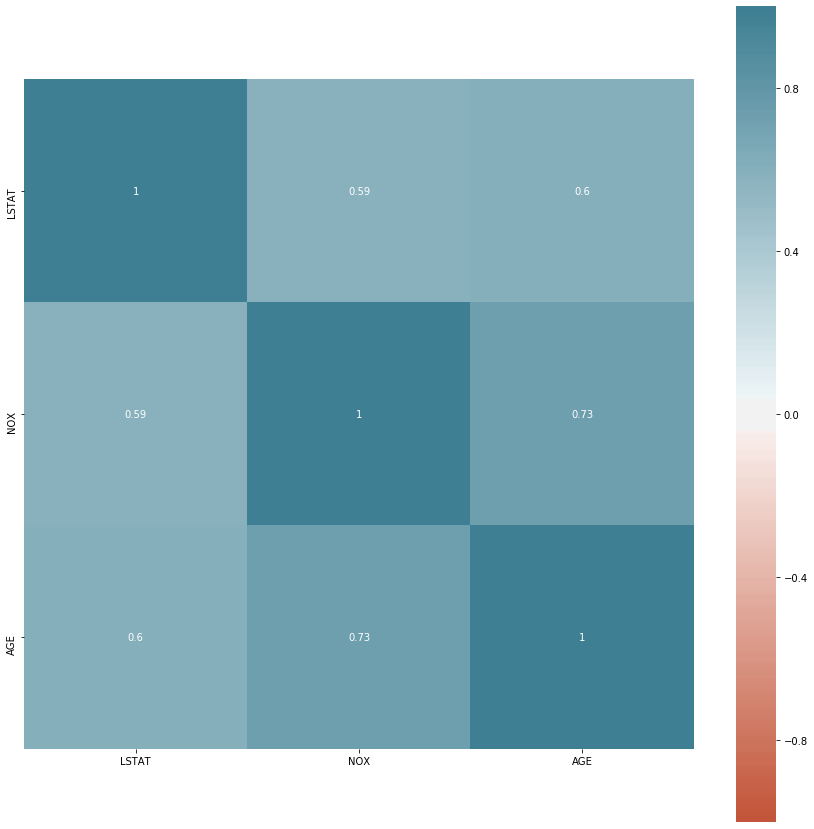

In [57]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# Create a new dataframe
lstat_df = df[["LSTAT", "NOX", "AGE"]]

# define the correlation matrix between the data columns in the set
lstat_corr = lstat_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(lstat_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Next lets consider the pair plot for this relationship:

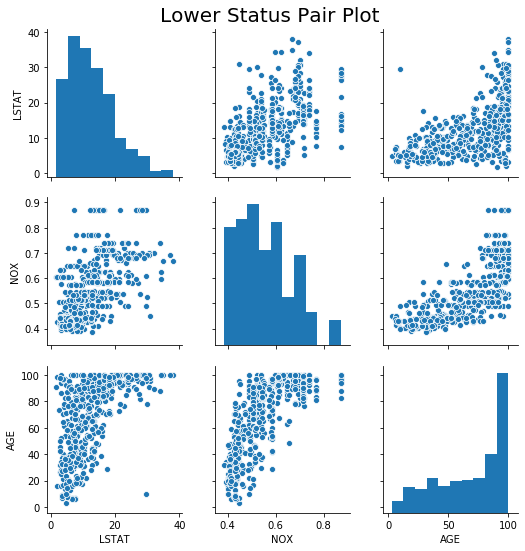

In [58]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# pair plot to visualise the correlations
lstat_pair_plt = sns.pairplot(lstat_df)
lstat_pair_plt.fig.suptitle("Lower Status Pair Plot", size="20", va="bottom")
plt.show()

These plots do show that NOX levels tend to be higher in areas with a higher proportion of lower status people. Therefore there may not be huge willingness for people to pay for air quality improvements - as better off people are more likelt to live in areas with cleaner air, and the poorer people who are more likely to  live in areas with lower quality air are unlikely to be able to pay for these improvements

## 3. Comparing House Prices with Inferential Statistics

In section 2 we used descriptive statistics to describe the relationships between the various features of the Boston housing data set. In this section we are going to use *inferential statistics* to investigate the relationship between the proximity of a house to the Charles river and median value of houses in that area. The plan for this section is as follows:

* Introduce inferential statistics
* Consider the *t-test* with respect to the dataset 
* Select an appropriate *t-test* and carry it out on the data
* Present the results and discuss the findings

#### 3.1 Introduction to Inferential Statistics

Inferential statistics allow us to make prediction or inferences from a set of sample data [15]. When using inferential statistics, an analyst will take samples of data and analyse these in order to make generalisations about the entire population. This is often done because it is infeasible, impractical or impossible to analyse the entire population. One case where inferential statistics are used heavily is in political opinion polls. When carrying these polls it is not possible to ask everybody in the entire country their opinion on a particular matter, instead the researchers will choose a representative sample of the population and survey that. They will then analyse the results of from this surveyed sample and make inferences about the entire population from this. There are two main areas of inferential statistics, these are:

1. Estimation (of a population statistic based on a sample statistic)
1. Hypothesis Testing (comparing the means of two related groups of data)

#### 3.1.1 Estimation [16]

Take the case where a researched wants to determine what proportion of children aged 8 to 10 like football. What tey could do is design a survey where they take a sample of 1000 children and survey them. A properly designed survey will ensure that the sample includes a proportional amount of children based on gender, whether they are urban or rural, economic background etc. However, no matter how well the sample is chosen the researcher must remember that it is still just a sample of the population - and that these samples can vary. I other words if the survey was repeated using the same proportions of boys/girls, urban/rural but using different children he results are likely to vary from survey to survey. In order to build confidence in the research, a *margin of error (MOE)* should be included with all inferential estimation statistics. The MOE measures how close the sample statistic is likely to be to the population parameter that is being studied. The MOE is calculated to a confidence interval decided by the researcher. If the survey in question was to be carried out a large number of times, most times the sample mean will be close to the population mean, but these survey means will be distributed and there is always a small chance that some surveys will show very high proportions of children age 8 to 10 that like football, (or very low proportions). 

The process the researcher will follow is this:

* Calculate the sample mean (say 60%) - this says 60% of children aged 8 to 10 like football
* Decide on a confidence interval for the margin of error (i.e. what percentage of samples are likely to fall within the margin or error - say 95%)
* Use a Standard Normal Distribution (Normal Distribution with mean = 0 and standard deviation = 1), to determine a z value at 95% (this is 1.96)
* Calculate the margin of error as follows:
$$ MOE = z * \sqrt{\dfrac{p(1-p)}{n}}$$

Where:
* z is determined from the table
* n is the sample size
* p is the sample proportion (60% in the example above)

We can calculate the MOE using python.

In [59]:
# define the variables
n = 1000
p = 0.60
z = 1.96
# calculate the MOE
MOE = (z * (p*(1-p)/n)**0.5)

print("The % margin of error for this study is:", round(MOE*100,2), "%")

The % margin of error for this study is: 3.04 %


So the researcher could conclude that the percentage of all children aged 8 to 10 that like football is 60% with a margin of error of 3% at a 95% confidence interval. What this means is that is 1000 children aged 8 to 10 were polled as to whether or not they like football, the result would lie between 57% and 63% 95% of the time.

#### 3.1.2 Hypothesis Testing

When carrying out a comparison study is not possible, or feasible to compare every subject that is to be studied. Instead we must collect a sample dataset and analyse that. From this we can make inferences about the population. An everyday application of this is in clinical trials for new medicines. If a pharmaceutical company wants to compare the performance of a new blood pressure medication to see if it provides better outcomes for patients than the current medication available it might carry out a trial as follows:
1. Select a 2000 people with high blood pressure
1. Measure their blood pressure before the trial
1. Give 1000 the current medication for 6 months
1. Give 1000 the new medication for 6 months
1. Measure their blood pressure again after 6 months and calculate the delta (difference between start and end blood pressure)
1. Calculate the average delta for the group on the old medication
1. Calculate the mean delta for the group on the new medication
1. Compare them to see if the the new medication has a higher delta than the old one (and hence is it more effective)

An issue with this method is that we have only considered a sample of the entire population. It is possible that if we repeated the test numerous times with different test subjects we would get many different outcomes and the actual mean deltas in blood pressure would be distributed. In order to determine the statistical significance of the findings of the study a *t-test* is carried out.

The steps for carrying out a t-test are as follows [17]:

1. State the hypothesis
1. Formulate an analysis plan
1. Analyse sample data
1. Interpret the results

**State the Hypothesis**

Every t-test requires the analyst to state the *null hypothesis* and the *alternative hypothesis* prior to carrying out the analysis. These are stated in such a way as that only one of them can the true and the other must be false. In the blood pressure example discussed above the null hypothesis would state there there is no difference between the means, meaning that the alternative hypothesis is there is a difference between the means. Or formally:
$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

**Formulate an analysis plan**

The analysis plan should state the following:
* The significance level - this is similar to the confidence level in estimation. We must declare what is acceptable. 95% is usually used - it means that if the same test was carried out 100 times using different samples we would expec to see the observed results 95% of the time.

* The test method. There are many different t-test methods such as independant test, paired tests, Welch tests etc. All of these are appropriate in different situations and this must be decided upon based on the data that has been collected.

**Analyse sample data**

A number of statistics need to be calculated on the dataset, note that the calculations shown below are for a independant 2 sample t-test.

*Standard Error, SE*

$$ SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

Where $s_1$ is the standard deviation of sample 1, $s_2$ is the standard deviation of sample 2, $n_1$ is the number of items in sample 1 and $n_2$ is the number of items in sample 2.

*Degrees of Freedom , DF*

$$ DF = \dfrac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{(\frac{\frac{s_1^2}{n_1}}{n_1-1})+(\frac{\frac{s_2^2}{n_2}}{n_2-1})}$$

note that the degrees of freedom is related to the sample size. This is used because the t-distribution is not one distribution but rather a family of distributions. Larger sample sizes with more degrees of freedom result is leaner distributions. When sample sizes are smaller the t-distribution is more spread out p making it more difficult to discern statistical significance as a higher percentage of possible outcomes will be in areas past the critical values. 

<p align="center">
  <img src="img/tdist.jpg" width="500"/></p>
  
*Test Statistic, t*

$$t = \dfrac{\overline{x_1}-\overline{x_2}}{SE}$$

Where $\overline{x_1}$ is the mean of sample 1, and $\overline{x_2}$ is the mean of sample 2. Note for simplicity I have kept this definition to th case where we comparing whether 2 means are equal or not. 

*p Value, p*
This is the probability of observing an outcome as extreme as the test statistic. This was traditionally looked up in tables based on the significance level for the test and the degrees of freedom in the data. There are packages in python such as `scipy.stats` that will calculate the t stat ad corresponding p value for us.


**Interpret the results**

When the sample findings are unlikely the null hypothesis is rejected. This is usually done by comping the p value to the significance level. If the p value is less than the significance the level the null hypothesis is rejected in favour of the alternative hypothesis. In other words if a significance level of 0.95 is selected it means that we would expect to see similar results 95% of the time with different samples. If the p value (probability of of observing the outcome by chance) is less than 0.05 it means that the results are statistically significant or that the feature that is being observed is having a greater impact on the outcome than change alone.

### 3.2 Hypothesis testing and the Boston Housing Dataset

One of the objectives of this projects is to use inferential statistics to determine whether or not there is a significant difference in house prices between house that are located along the Charles river and those that aren't. This will be done using the methodology described in Section 3.1.2.

#### 3.2.1 State the Hypothesis

For this analysis the null hypothesis will be that there is no difference between the median values of house located near the Charles river (call this $\mu_c$)and the median values of houses that are not located along the Charles  river (call this $\mu_n$). Or more formally:

$$H_0: \mu_c = \mu_n$$
$$H_a: \mu_c \neq \mu_n$$


#### 3.2.2. Formulate an Analysis Plan

For this analysis a significance level of 0.95 will be chosen. We will accept the result as statistically significant id the calculated p-value for the test is below 0.05. In addition to this we need to select an appropriate t-test procedure for our data. As the data is independant (houses along the Charles river are not related to the houses that are not along the river) we must use an independant test. Also as we have defined the null hypothesis as $H_0: \mu_c = \mu_n$ and the alternative hypothesis as $H_a: \mu_c \neq \mu_n$ we must use a 2-tailed test as the alternative hypothesis covers both cases where $\mu_c > \mu_n$ and $\mu_c < \mu_n$. 

First we will consider the independant 2-tailed test which is appropriate when the following conditions are met:

1. The sampling method for each sample is simple random sampling.
1. The samples are independent.
1. Each population is at least 20 times larger than its respective sample.
1. The sampling distribution is approximately normal, which is generally the case if any of the following conditions apply.
    * The population distribution is normal.
    * The population data are symmetric, unimodal, without outliers, and the sample size is 15 or less.
    * The population data are slightly skewed, unimodal, without outliers, and the sample size is 16 to 40.
    * The sample size is greater than 40, without outliers.
    
Assumptions 1,2 and 3 hold true as the data was randomly collected, the samples are independant and the population (number of houses in the Boston area) would more than 20 times larger that the 500 data points in the set. We need to consider point - particularly the last point as we have more than 40 data points. We need to check the dataset for the presence of outliers. The simplest way to do this is to plot a box plot.    

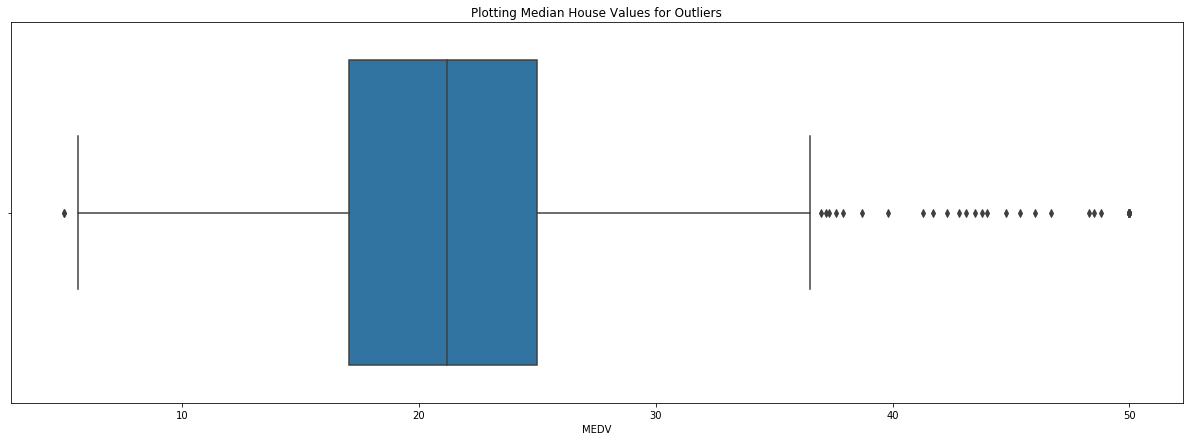

In [60]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

ax = sns.boxplot(x=df["MEDV"]).set_title('Plotting Median House Values for Outliers')

The boxplot shows that there are a significant number of outliers at the upper end of the data set and a smaller number at the lower end. This means that the assumptions for a t-test are violated. In this case we can do one of the following things [18]:

* Check the data – in particular, make sure that that the problematic data are true outliers and not errors in copying
* Ignore the problem – not recommended since this will often yield inaccurate results, although often acceptable if the violation of the assumptions is not too severe
* Perform one of the modified t tests (e.g. Trimmed Means Test or Yuen-Welch’s Test)
* Transform the variable, the Box-Cox transformation can be especially useful
* Use a non-parametric test

Having carried out some internet research I have concluded that non-parametric test are easier to apply since fewer assumptions need to be applied [19]. This research has also led me to the Wilcoxon Rank Sum test for independant samples [20][21], which can be applied rovided the two independent samples are drawn from populations with an ordinal distribution. One of the caveats to using this test is that we have to modify our null and alternative hypotheses slightly to fit this test. Rather that using "the means are equal" for our null hypothesis we instead claim it as follows:

$H_0$: the observations come from the same population

Meaning the alternative hypothesis is:

$H_a$: the observations do not come from the same population

Its a small detail but its worth noting.

#### 3.2.3 Analyse Sample Data

The first step we must carry out is to see if our sample data shows a difference in median house values depending on proximity to the river. 

In [61]:
# split the data in 2 2 dataframes depending on location
df_near_chas = df[df["CHAS"]==1]
df_not_chas = df[df["CHAS"]==0]
# print the mean of the median values depending location
print("The mean of the median values of houses near the Charles river is: ",round(df_near_chas["MEDV"].mean(),2),"thousand dollars")
print("The mean of the median values of houses not near the Charles river is: ",round(df_not_chas["MEDV"].mean(),2),"thousand dollars")
print("The percentage difference is :",
      (df_near_chas["MEDV"].mean()-df_not_chas["MEDV"].mean()/df_not_chas["MEDV"].mean()),"%")

The mean of the median values of houses near the Charles river is:  28.44 thousand dollars
The mean of the median values of houses not near the Charles river is:  22.09 thousand dollars
The percentage difference is : 27.44 %


Our sample data is telling us that median value of houses near the river are 6 thousand dollars higher than those not on the river. This would mean that houses near the river have a median value that is 27% higher than those not on the river.

The next step is to visualise the data to see if this difference is obvious graphically. Note that as there are many more data points not near the Charles river, I am plotting the densities so that the data is easier to compare.

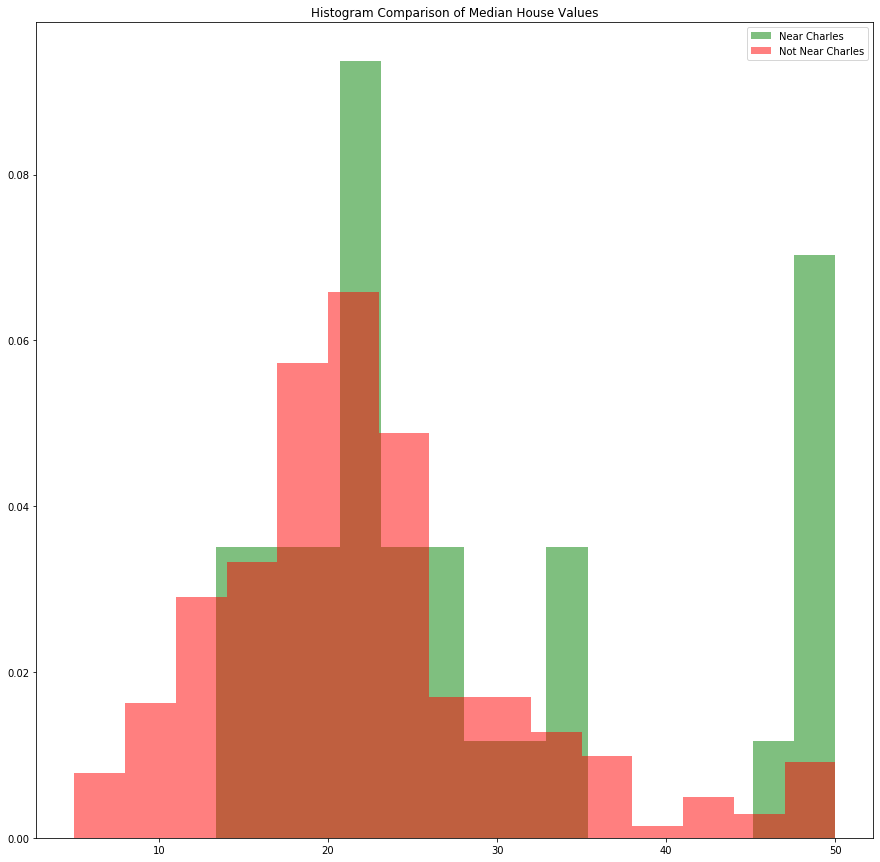

In [62]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# plot the histograms
plt.hist(df_near_chas["MEDV"], bins=15, color="green", alpha=0.5, density=True, label="Near Charles")
plt.hist(df_not_chas["MEDV"], bins=15, color="red", alpha=0.5, density=True, label="Not Near Charles")
plt.title("Histogram Comparison of Median House Values")
plt.legend()
plt.show()

The first thing that jumps put from this chart is that in general house values of houses not along the river are normally distributed around the calculate mean of about 22 thousand. The values of houses that are not along the river are a bit different - in general they follow a similar patter to those not along the river, but the mean is being inflated by a higher proportion of data points that have much higher house values. So our hypothesis test should tell us how statistically significant the impact of these higher valued houses are on the whole.

In [63]:
# use scipy to calculate the t-stat and p-value of the Wilcoxon Rank Sum test
stats.ranksums(df_not_chas["MEDV"], df_near_chas["MEDV"])

RanksumsResult(statistic=-3.1597469070918573, pvalue=0.0015790624227478714)

#### 3.2.4 Interpret Results

Based on the analysis of the data we can conclude the following:
* Median house values along the river are approx 6,000 dollars (or 27%) more higher than those that are not along the river.
* Since the p-value (0.0015) is less that the significance level (0.05) we cannot accept the null hypothesis that the samples were drawn from the sample population.
* Therefore the differences are statistically significant.

Something that is worthy of further discussion is the impact of the outliers on the significance. As part of the experimental design it was determined that the sampled data did not meet the condition of being normally distributed (without outliers). One of the suggested options I came across in my research was to ignore it (but it wasn't highly recommended). Had I ignored it I could have used the standard independant t-test for statistical significance. The results of which would have been as follows:

In [64]:
# use scipy to calculate the t-stat and p-value of the independant t-test
stats.ttest_ind(df_not_chas["MEDV"], df_near_chas["MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Note that in this case the p value is significantly lower - 2 orders of magnitude lower in fact. By simply ignoring the fact that the data had outliers it could easily allow somebody to reject a null hypothesis incorrectly. This highlight the importance of checking the assumptions and then selecting an approriate test based on the sampled data.

## 4. Predicting Boston House Prices with Keras

<img src="img/keras.png" width="700"></img>

In this section we will use the machine learning package Keras and the Boston Housing dataset to create and train a neural network that will allows us to predict house prices based on the other features in the dataset. The plan for this section is as follows:

* General introduction to machine learning
* Introduction to neural networks
* Description of Keras and Tensorflow
* Create the machine learning model for making predictions
* Evaluate the model and discuss

### 4.1 Introduction to Machine Learning

The term *Machine Learning* was first coined in the 1950's by a prominent computer games pioneer named Arthur Samuel[23][25]. He defined it as the ability of computers to learn without being explicitly programmed. This definition was refined and formalised in 1997 by Tom Mitchell when he stated that *"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."*

<img src="img/machine.jpg" width="700"></img>

In recent years the term has become more commonplace as it is a fast growing subfield of computer science. If we are to consider how a machine might learn (or get better at some task with experience), it useful to think of how humans learn. Consider a person throwing a dart at a dartboard aiming for the bullseye. After 1 or 2 throws the might realise that they are throwing to too low, so they adjust the throwing angle. This may lead to the dart landing too high so the adjust the power used in the throw. Gradually and iteratively as the human gets more experience of the task they will get better at it. They are learning.

In the field of data analytics machine learning is used to create complex algorithms to analyse datasets that can then be used to make predictions. In fact the aim of this section of the project is to do just that! 

Depending on the problem to be solved, there are many different approaches to machine learning such as[24]:
* Supervised Learning
* Unsupervised Learning

In supervised learning, the algorithm is trained with data for which the model inputs are labelled with the deisred outputs by a human. An algorithm such as this will compare the actual outputs with the predicted outputs and improve the model. A common use case for this would be handwriting recognition, where a model could be trained on a set of data what typical letters look like so that when fed an unknown letter in the future it can predict what letter it is most likely to be. Supervised learning techniques are used to anaylse historic data with a view to predicting statistically likely future behaviour. We will use a supervised learning technique in this project to predict median house prices in the Boston area, based on the historical data that we have in the dataset.

In unsupervised learning, data is unlabelled. This means that the algorithm must determine the relationships between the input data. This is particularly useful in situations where the 'labelling' of data is unknown or unknowable. An example of where this might be used is in targeted marketing. By collecting large sets of data on customers and their purchases, it might be possible for an algorithm to detect whether a person is likely to enjoy a particular pastime and then direct targeted marketing based on this towards them.

Two of the most common supervised machine learning tasks are:

1. Regression - this is a supervised learning technique that is used when the outputs are numerical and continuous. We will used a regression technique when analysing the Boston data set.

1. Classification - this is used when inputs are divided into 2 more classes for outputs. Handwriting recognition is an example of this.

Machine learning algorithms make use of Neural Networks in order to learn from the data. These will be explained in the next section.

### 4.2 Introduction to Neural Networks

#### 4.2.1 Neurons

A neural network was defined as *a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs*, [26] by Dr. Robert Hecht-Nielsen, the inventor of one of the first neuro-computers. It is inspired by the way biological neurons in the human brain process information.

The basic unit of computation in a neural network in a neuron. A neuron receives information from an external source (or other neurons in the network) in the form of inputs. These inputs all have a weighting to determine there importance compared to other inputs. Each neuron also has a constant bias which is used to help refine the model, allowing the fit of the model to be improved [27].

The basic idea is that the weights are learnable and that they control the influence of of one neuron on another. Finally an activation function is applies to the output of the neuron. If we do not apply a Activation function then the output signal would simply be a simple linear function. Linear functions are limited their complexity and have less power to learn complex functional mappings from data. A Neural Network without an activation function would simply be a linear regression Model, which has limited power [28]. In short, when we train a neural network we want the neurons to fire whenever they learn specific patterns from the data, and we model the fire rate using an activation function [26]. 

A simple schematic of a 2-input neurons is shown below:

<img src="img/neuron schematic.png"></img>

As a demonstration, lets assume that $w_1$ has the value of 0 and $w_2$ has the value of 1. Lets also assume that the bias, b, is 4. For this example lets use [2,3] as the values for $x_1$ and $x_2$.Finally lets use the <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a> [29] as the activation function. The sigmoid function is commonly used for this purpose as it always returns values between 0 and 1. Is is defined as:
$$S(x) = \dfrac{e^x}{1 + e^x}$$
Using this data we can model the output of this neuron using Python:

In [65]:
# Define the sigmoid activation function
def sigmoid(x):
    e = math.e
    return (e**x/(1 + e**x))
# define the numpy arrays for the inputs and weight
inputs = np.array([2,3])
weights = np.array([0,1])
bias = 4

# get the dot product of the weights and inputs and add the bias
sum_in = np.dot(inputs, weights) + bias

#apply the activation function to get the output
output = sigmoid(sum_in)
print("The output from our simple 2-input neuron is ", round(output,3))   

The output from our simple 2-input neuron is  0.999


This demonstrates that individual neurons are quite simple. The complexity of the model lies the networking of these neurons.

#### 4.2.2 Neural Networks

A neural network is nothing more than a group of neurons connect together. Consider the following:

<img src="img/simple network.png" width=700></img>

The simple network above has:
1. An input layer with 2 inputs $x_1$ and $x_2$
1. A hidden layer with 2 neurons $h_1$ and $h_2$
1. A output layer $O_1$

Consider the case where where all neurons have the same weights, [0,1] as before, and bias ,0 to keep the maths simple. Again we'll use the sigmoid activation function on the output of all neurons. Assuming the same inputs as before ($x_1$ = 2, $x_2$ = 3). We can calculate the value output from the network as follows.

In [66]:
# define the inputs
inputs = [2,3]
weights = [0,1]
bias = 0
# calculate output from h1
h1_sum_in = np.dot(inputs, weights) + bias
h1 = sigmoid(h1_sum_in)

# calculate the output from h2
h2_sum_in = np.dot(inputs, weights) + bias
h2 = sigmoid(h2_sum_in)

# set these outputs as the inputs to the output neuron
o1_inputs = [h1,h2]

# calculate the output, o1
o1_sum_in = np.dot(o1_inputs, weights) + bias
o1 = sigmoid(o1_sum_in)

# print the output
print("The output from our simple 2-input neural network is ", round(o1,3))   

The output from our simple 2-input neural network is  0.722


That demonstrates how individual neurons can be connected into a network, and how the calculations are carried out through the network. Note the following:
1. Input Layer: There is no computation done on the input layer. These values are passed into the next layer for computation
1. Hidden Layer: The computation and processing is carried out in the hidden layers and the output from these are carried forward to the next layers.
1. Output Layer: It is possible to have multiple output nodes in this layer, if we are trying to predict more than one output based on the input data.
1. Connections: As demonstrated, the network consists on weighted connections between the neurons.
1. Activation Function: This defines the output of a neuron for a given set of inputs. 
1. Learning rule: This is an algorithm that modified the parameters (weight and biases) of the model to produce a favoured output for a given set of inputs.

#### 4.2.3 Training the Neural Network

For this project, the plan will be to use the Python packages Tensorflow and Keras to model a neural network and then train it using the Boston Housing Dataset, so that this network could then be used for predicting house prices of other houses. The process of training the network can be quite tricky and is very much one of trial and error. A good approach to training such a network would be as follows:
1. Decide what features of the dataset might make good indicators to be used for estimating house prices.
1. Create a model using the Keras package
1. Define how many layers you want in the model and how many neurons to use in each layer. Note that this can be picked arbitrarily first and refined later.
1. Decide on the activation function for each layer. Again this can be chosen by trial and error as the model is refined.
1. Define 1 neuron in the output layer representing the house prices.
1. Decide on the optimser [30]. This is the process that the algorithm uses to iteratively improve the biases and weights. Common optimisers are 'Adam' and 'Stochastic Gradient Descent'.
1. Decide on the loss function. We will used mean squared error for this. Training the neural network is iterative. We show it some outputs for a given set of inputs. It will select weights and biases for each neuron in the network and calculate the outputs. It will compare the calculated output to the actual output. The loss function is a measure of the difference between these values. The same inputs will be shown to the network again, the biases and weights will be modified to try and improve the difference between the actual outputs and calculated outputs. This will be repeated as many times are requested (defined as EPOCHS), each time trying to reduce this loss. The closer to zero the loss is, the better the model will be at predicting house prices based on the inputs. Mean squared error is calculated by taking the difference between each actual output value and predicted output value, squaring it, summing them up and dividing by the number of data points [31]:

$$MSE =  \frac{1}{n} \sum_{n=1}^{n} (Y_i-\hat{Y_i})^2$$

This will allow us to build the model in Keras. The next step is to train the model with the data in the dataset. To help evaluate the dataset it is good practice to keep some of the data back. For this project we will allocate 20% of the data points in the boston housing dataset for testing. The model will be trainined using the other 80%. This will allow us to show the model the testing data (which it hasn't seen before) and ask it to predict the house proves based on this. We can then plot a scatter plot between the actual outputs and predicted outputs to determine how accurate our predictions are.

### 4.3 Creating a Neural Network with the Boston Housing Data  

In this section we will create the model use for making the predictions. Initially we will use the full dataset for this purpose. We will evaluate it's performance at making predictions and see what modifications might be appropriate. The model will be used to try and predict housing prices which are a continuous variable. For this reason this is can be modeled as a regression problem, so I have followed a regression tutorial from the Tensorflow documentation while creating this model [22]. 

The process for creating the model is as follows:

1. Import the dataset (this is complete in section 1 above)
1. Inspect the dataset
1. Clean the dataset if necessary
1. Split the dataset into testing and training data
1. Split the features from the targets (or inputs from outputs)
1. Normalise the data
1. Build the model
1. Train the model
1. Test and evaluate 
1. Modify the model if required and re-evaluate

#### Inspect the dataset and clean it
In this section we will take a look at the dataset to see what kinds of data is in the dataset.

In [67]:
# take a 5 random point from the set
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24,19.4
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11,21.4
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36,23.1


The dataset contains all numerical fields. This means that there is no requirement to transform any categorical fields to numerical fields. Next we need to determine if there is any missing data.

In [68]:
# check for missing data values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing data points in the dataset. 

#### Split the data set into training and testing data.
In order to evaluate the performance of the model, we need to be able to feed data to it that is hasn't seen before and then compare the actual values of the output to the predicted values. For this model I will use 80% of the data in the data set to train the model leaving me 20% of the data points to test it.

In [69]:
# select 80% of the dataset at random
train_dataset = df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["CRIM"].count())
print("There are %d data points in the training set" % train_dataset["CRIM"].count())
print("There are %d data points in the test set" % test_dataset["CRIM"].count())

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


As the entire dataset as 506 data points, the training set has 405 points and the test set has 101 points, it looks like the dataset has been split correctly with 80% of the data points going into the training set.

#### Split the features from the targets
In the next step we will separate the features from the targets. Features will act as inputs to the models these are the things that are used to help predict the targets. The targets are the outputs of the model, i.e. the things we are trying to predict. For this exercise we are trying to predict the median house value (MEDV), so we will separate it from the main training and test datasets using the `pandas` `pop` function.

In [70]:
# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

So at this stage we have inspected the dataset to see if it required cleaning, and then split the dataset into 4 smaller datasets training features, training targets, testing features and testing targets.

#### Normalising the data

It is good practice to normalise data that use different ranges and scales. This makes it easier to train the dataset. The datasets are normalised by subtracting the mean of the training dataset and dividing by the mean. This will distribute the data with a mean of 0 and a standard deviation of 1. Otherwise there is a risk that features that are on a different scale might be more influential in the model. Note that we calculate these statistics from the training dataset but also use them to normalise the test dataset too. This is done to project the test dataset around the same distribution as the training dataset.

The first step is to determine the mean and standard deviation for each feature in the dataset. This is done using the `pandas` `describe` function. We then transpose them. 

In [88]:
# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# create a normaliser function
def norm(x):
  return ((x - train_stats["mean"])/ train_stats["std"])

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#### Build Model

Note that the code for this was adapted from the Tensorflow regression tutorial. In the tutorial they define a function that is used to build the model. I have decided to start with the same size and shape of neural network as defined in the tutorial. I have change the activation functions to the sigmoid function. I am using 'Adam' as the optimser and using mean squared error as the loss function.

In [89]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='sigmoid', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='sigmoid'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='adam', loss='mean_squared_error')

#### Training the model

In this section we will decide how many times to run the the data through the model. I have decided on 1000 times for the first run. 

In [90]:
# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/sample - loss: 496.2074
Epoch 2/1000
405/405 [==============================] - 0s 203us/sample - loss: 360.3603
Epoch 3/1000
405/405 [==============================] - 0s 205us/sample - loss: 278.6600
Epoch 4/1000
405/405 [==============================] - 0s 234us/sample - loss: 226.0626
Epoch 5/1000
405/405 [==============================] - 0s 203us/sample - loss: 187.3141
Epoch 6/1000
405/405 [==============================] - 0s 202us/sample - loss: 157.6239
Epoch 7/1000
405/405 [==============================] - 0s 203us/sample - loss: 134.5253
Epoch 8/1000
405/405 [==============================] - 0s 195us/sample - loss: 117.3700
Epoch 9/1000
405/405 [==============================] - 0s 197us/sample - loss: 103.9567
Epoch 10/1000
405/405 [==============================] - 0s 207us/sample - loss: 93.3990
Epoch 11/1000
405/405 [==============================] - 0s 204us/sample - loss: 84.8942
Epoch 12/1000
405/405 [

405/405 [==============================] - 0s 210us/sample - loss: 13.8774
Epoch 94/1000
405/405 [==============================] - 0s 210us/sample - loss: 13.7379
Epoch 95/1000
405/405 [==============================] - 0s 212us/sample - loss: 13.5707
Epoch 96/1000
405/405 [==============================] - 0s 202us/sample - loss: 13.4998
Epoch 97/1000
405/405 [==============================] - 0s 212us/sample - loss: 13.3529
Epoch 98/1000
405/405 [==============================] - 0s 191us/sample - loss: 13.2372
Epoch 99/1000
405/405 [==============================] - 0s 198us/sample - loss: 13.1791
Epoch 100/1000
405/405 [==============================] - 0s 204us/sample - loss: 13.0779
Epoch 101/1000
405/405 [==============================] - 0s 202us/sample - loss: 12.8821
Epoch 102/1000
405/405 [==============================] - 0s 195us/sample - loss: 12.7574
Epoch 103/1000
405/405 [==============================] - 0s 194us/sample - loss: 12.6999
Epoch 104/1000
405/405 [=======

405/405 [==============================] - 0s 201us/sample - loss: 8.5273
Epoch 185/1000
405/405 [==============================] - 0s 190us/sample - loss: 8.4012
Epoch 186/1000
405/405 [==============================] - 0s 191us/sample - loss: 8.6913
Epoch 187/1000
405/405 [==============================] - 0s 184us/sample - loss: 8.4528
Epoch 188/1000
405/405 [==============================] - 0s 188us/sample - loss: 8.3933
Epoch 189/1000
405/405 [==============================] - 0s 191us/sample - loss: 8.3663
Epoch 190/1000
405/405 [==============================] - 0s 198us/sample - loss: 8.3006
Epoch 191/1000
405/405 [==============================] - 0s 204us/sample - loss: 8.1516
Epoch 192/1000
405/405 [==============================] - 0s 204us/sample - loss: 8.2203
Epoch 193/1000
405/405 [==============================] - 0s 190us/sample - loss: 8.1039
Epoch 194/1000
405/405 [==============================] - 0s 187us/sample - loss: 8.2168
Epoch 195/1000
405/405 [============

405/405 [==============================] - 0s 189us/sample - loss: 6.2787
Epoch 277/1000
405/405 [==============================] - 0s 183us/sample - loss: 6.1645
Epoch 278/1000
405/405 [==============================] - 0s 181us/sample - loss: 6.2236
Epoch 279/1000
405/405 [==============================] - 0s 187us/sample - loss: 6.2097
Epoch 280/1000
405/405 [==============================] - 0s 181us/sample - loss: 6.2293
Epoch 281/1000
405/405 [==============================] - 0s 194us/sample - loss: 6.1638
Epoch 282/1000
405/405 [==============================] - 0s 192us/sample - loss: 6.1701
Epoch 283/1000
405/405 [==============================] - 0s 198us/sample - loss: 6.1768
Epoch 284/1000
405/405 [==============================] - 0s 195us/sample - loss: 6.0687
Epoch 285/1000
405/405 [==============================] - 0s 193us/sample - loss: 6.0546
Epoch 286/1000
405/405 [==============================] - 0s 187us/sample - loss: 6.1392
Epoch 287/1000
405/405 [============

405/405 [==============================] - 0s 187us/sample - loss: 5.1863
Epoch 369/1000
405/405 [==============================] - 0s 191us/sample - loss: 5.1187
Epoch 370/1000
405/405 [==============================] - 0s 186us/sample - loss: 5.1066
Epoch 371/1000
405/405 [==============================] - 0s 190us/sample - loss: 5.0578
Epoch 372/1000
405/405 [==============================] - 0s 184us/sample - loss: 5.0553
Epoch 373/1000
405/405 [==============================] - 0s 183us/sample - loss: 5.0788
Epoch 374/1000
405/405 [==============================] - 0s 188us/sample - loss: 5.2559
Epoch 375/1000
405/405 [==============================] - 0s 199us/sample - loss: 5.0903
Epoch 376/1000
405/405 [==============================] - 0s 199us/sample - loss: 5.1484
Epoch 377/1000
405/405 [==============================] - 0s 211us/sample - loss: 5.0966
Epoch 378/1000
405/405 [==============================] - 0s 209us/sample - loss: 5.3225
Epoch 379/1000
405/405 [============

405/405 [==============================] - 0s 194us/sample - loss: 4.3924
Epoch 461/1000
405/405 [==============================] - 0s 191us/sample - loss: 4.3008
Epoch 462/1000
405/405 [==============================] - 0s 182us/sample - loss: 4.2916
Epoch 463/1000
405/405 [==============================] - 0s 184us/sample - loss: 4.2670
Epoch 464/1000
405/405 [==============================] - 0s 182us/sample - loss: 4.3098
Epoch 465/1000
405/405 [==============================] - 0s 181us/sample - loss: 4.2651
Epoch 466/1000
405/405 [==============================] - 0s 183us/sample - loss: 4.2743
Epoch 467/1000
405/405 [==============================] - 0s 198us/sample - loss: 4.2777
Epoch 468/1000
405/405 [==============================] - 0s 193us/sample - loss: 4.2433
Epoch 469/1000
405/405 [==============================] - 0s 194us/sample - loss: 4.2049
Epoch 470/1000
405/405 [==============================] - 0s 184us/sample - loss: 4.1903
Epoch 471/1000
405/405 [============

405/405 [==============================] - 0s 192us/sample - loss: 3.6167
Epoch 553/1000
405/405 [==============================] - 0s 185us/sample - loss: 3.5419
Epoch 554/1000
405/405 [==============================] - 0s 185us/sample - loss: 3.5336
Epoch 555/1000
405/405 [==============================] - 0s 185us/sample - loss: 3.6097
Epoch 556/1000
405/405 [==============================] - 0s 188us/sample - loss: 3.4844
Epoch 557/1000
405/405 [==============================] - 0s 183us/sample - loss: 3.5382
Epoch 558/1000
405/405 [==============================] - 0s 193us/sample - loss: 3.5356
Epoch 559/1000
405/405 [==============================] - 0s 195us/sample - loss: 3.5603
Epoch 560/1000
405/405 [==============================] - 0s 194us/sample - loss: 3.4467
Epoch 561/1000
405/405 [==============================] - 0s 191us/sample - loss: 3.4789
Epoch 562/1000
405/405 [==============================] - 0s 183us/sample - loss: 3.4369
Epoch 563/1000
405/405 [============

405/405 [==============================] - 0s 191us/sample - loss: 2.8487
Epoch 645/1000
405/405 [==============================] - 0s 194us/sample - loss: 2.9690
Epoch 646/1000
405/405 [==============================] - 0s 178us/sample - loss: 2.8575
Epoch 647/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.9031
Epoch 648/1000
405/405 [==============================] - 0s 178us/sample - loss: 2.8628
Epoch 649/1000
405/405 [==============================] - 0s 184us/sample - loss: 2.8718
Epoch 650/1000
405/405 [==============================] - 0s 188us/sample - loss: 2.8332
Epoch 651/1000
405/405 [==============================] - 0s 192us/sample - loss: 2.8437
Epoch 652/1000
405/405 [==============================] - 0s 193us/sample - loss: 2.9085
Epoch 653/1000
405/405 [==============================] - 0s 190us/sample - loss: 2.7826
Epoch 654/1000
405/405 [==============================] - 0s 182us/sample - loss: 2.8285
Epoch 655/1000
405/405 [============

405/405 [==============================] - 0s 210us/sample - loss: 2.3376
Epoch 737/1000
405/405 [==============================] - 0s 182us/sample - loss: 2.4719
Epoch 738/1000
405/405 [==============================] - 0s 180us/sample - loss: 2.4481
Epoch 739/1000
405/405 [==============================] - 0s 184us/sample - loss: 2.3912
Epoch 740/1000
405/405 [==============================] - 0s 183us/sample - loss: 2.3867
Epoch 741/1000
405/405 [==============================] - 0s 182us/sample - loss: 2.2845
Epoch 742/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.2994
Epoch 743/1000
405/405 [==============================] - 0s 199us/sample - loss: 2.3246
Epoch 744/1000
405/405 [==============================] - 0s 208us/sample - loss: 2.3080
Epoch 745/1000
405/405 [==============================] - 0s 189us/sample - loss: 2.3113
Epoch 746/1000
405/405 [==============================] - 0s 184us/sample - loss: 2.3422
Epoch 747/1000
405/405 [============

405/405 [==============================] - 0s 180us/sample - loss: 1.9467
Epoch 829/1000
405/405 [==============================] - 0s 192us/sample - loss: 1.9173
Epoch 830/1000
405/405 [==============================] - 0s 183us/sample - loss: 1.9471
Epoch 831/1000
405/405 [==============================] - 0s 180us/sample - loss: 1.9927
Epoch 832/1000
405/405 [==============================] - 0s 186us/sample - loss: 1.9374
Epoch 833/1000
405/405 [==============================] - 0s 183us/sample - loss: 2.0252
Epoch 834/1000
405/405 [==============================] - 0s 190us/sample - loss: 1.9947
Epoch 835/1000
405/405 [==============================] - 0s 203us/sample - loss: 1.9051
Epoch 836/1000
405/405 [==============================] - 0s 194us/sample - loss: 1.8864
Epoch 837/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.9302
Epoch 838/1000
405/405 [==============================] - 0s 183us/sample - loss: 1.8735
Epoch 839/1000
405/405 [============

405/405 [==============================] - 0s 181us/sample - loss: 1.5888
Epoch 921/1000
405/405 [==============================] - 0s 190us/sample - loss: 1.6128
Epoch 922/1000
405/405 [==============================] - 0s 188us/sample - loss: 1.6291
Epoch 923/1000
405/405 [==============================] - 0s 191us/sample - loss: 1.5696
Epoch 924/1000
405/405 [==============================] - 0s 182us/sample - loss: 1.6547
Epoch 925/1000
405/405 [==============================] - 0s 183us/sample - loss: 1.5888
Epoch 926/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.6298
Epoch 927/1000
405/405 [==============================] - 0s 195us/sample - loss: 1.6121
Epoch 928/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.6269
Epoch 929/1000
405/405 [==============================] - 0s 254us/sample - loss: 1.6460
Epoch 930/1000
405/405 [==============================] - 0s 288us/sample - loss: 1.7067
Epoch 931/1000
405/405 [============

#### Test and Evaluate the Model

Finally we need to determine how good the model is at predicting house prices. For this we will use our trained model, and our test data set. We will create test predictions and compare them to the actual values using a scatterplot. We will probably need to do this several times when optimising the model so I will create a function for testing and evaluating.

Plot the scatter plot and calculate the the linear regression stats

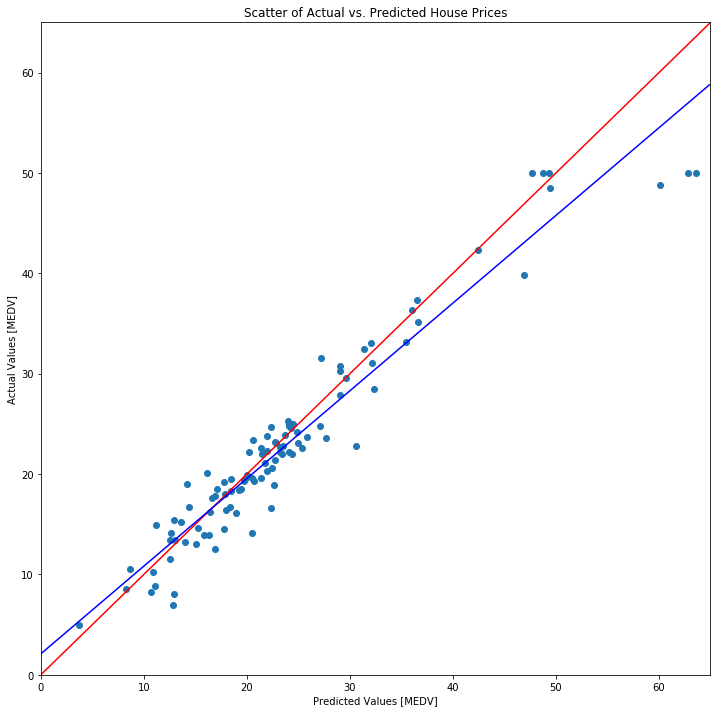

The r-squared value for this evaluation is:  0.927
The slope of the line in this evaluation is:  0.874
The y-intercept in this evaluation is;  2.091


In [92]:
def eval_plot(test_data_inputs, test_data_outputs):

    # predict using the test data
    test_predictions = model.predict(test_data_inputs)

    # Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
    plt.rcParams['figure.figsize'] = [12, 12]

    # calculate the the linear regression stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(test_predictions.T, test_data_outputs)

    # title
    plt.title("Scatter of Actual vs. Predicted House Prices")

    # set the x and y limits
    lims = [0, 65]
    plt.xlim(lims)
    plt.ylim(lims)

    # label the axes
    plt.ylabel('Actual Values [MEDV]')
    plt.xlabel('Predicted Values [MEDV]')

    # plot a red line (y=x)
    _ = plt.plot(lims, lims, c='red')

    # plot the scatter
    plt.scatter(test_predictions.T, test_targets)

    # plot best-fit line
    x = np.arange(0,65,0.1)
    y = slope * x + intercept

    plt.plot(x,y,'b-')

    plt.show()

    # print the linear regression stats
    print("The r-squared value for this evaluation is: ", round(r_value*r_value,3))
    print("The slope of the line in this evaluation is: ", round(slope,3))
    print("The y-intercept in this evaluation is; ",round(intercept,3))
 
# call the function
eval_plot(normed_test_data, test_targets)

To evaluate this model we need to consider both the graph and the linear regression stats. If the model made perfect predictions all of the points would lie on the blue line, and the blue line would lie exactly on the red line. There seems to be a good correlation between the predicted values and the true values as the $r^2$ value for the evaluation model us high at nearly 0.95. However the best fit line for the points is not $y = x$, therefore there is some scope to try and improve the model. In the following section we will carry out the following to try and improve the model:

1. Experiment with some different activation functions.
1. Experiment with some different optimizers. 
1. Change the shape of the model by adding more hidden layers.
1. Change the shape of the model by modifying the number of neurons in each layer.
1. Investigate the impact of the number of epochs on the loss functions
1. Build a new model using only a subset of the data (In Section 1 were determined that LSTAT and RM were highly correlated to the MEDV)

### Optimising the model

In this section we will look at optimising the model as descibed above. First we will look at changing just the activation functions. We will then re-evaluate to see which one gives the best results for this model.


#### Testing Activation Functions
While researching this project I came across 3 other activation functions[32] that can be investigated to see do they improve the prediction. These are:

* linear, this is a basic activation function that does not apply any transformation to the output of the neurons
* tanh, this is the hyperbolic tan function. It is similar to the sigmoid function but it returns values in the range -1 to 1
* relu, this returns 0 for negative values - otherwise it is just a linear function.

In this next step we will rebuild the model 3 times, each using a different activation function. We will train each model using the training data and test as before to see if any other activation function improves on the sigmoid function from the last section.

#### The linear activation function

In this step we will build the model as before except this time we will only use a linear activation function. First we build, compile and train the model.

In [93]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='linear', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='linear'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='adam', loss='mean_squared_error')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/sample - loss: 551.9307
Epoch 2/1000
405/405 [==============================] - 0s 218us/sample - loss: 471.4266
Epoch 3/1000
405/405 [==============================] - 0s 206us/sample - loss: 343.5864
Epoch 4/1000
405/405 [==============================] - 0s 211us/sample - loss: 153.4780
Epoch 5/1000
405/405 [==============================] - 0s 202us/sample - loss: 40.5642
Epoch 6/1000
405/405 [==============================] - 0s 218us/sample - loss: 25.6844
Epoch 7/1000
405/405 [==============================] - 0s 201us/sample - loss: 25.5184
Epoch 8/1000
405/405 [==============================] - 0s 223us/sample - loss: 25.2804
Epoch 9/1000
405/405 [==============================] - 0s 208us/sample - loss: 24.6172
Epoch 10/1000
405/405 [==============================] - 0s 207us/sample - loss: 25.8246
Epoch 11/1000
405/405 [==============================] - 0s 209us/sample - loss: 24.6306
Epoch 12/1000
405/405 [=====

Epoch 93/1000
405/405 [==============================] - 0s 219us/sample - loss: 25.1109
Epoch 94/1000
405/405 [==============================] - 0s 203us/sample - loss: 24.7208
Epoch 95/1000
405/405 [==============================] - 0s 201us/sample - loss: 25.0572
Epoch 96/1000
405/405 [==============================] - 0s 191us/sample - loss: 25.9957
Epoch 97/1000
405/405 [==============================] - 0s 186us/sample - loss: 25.3163
Epoch 98/1000
405/405 [==============================] - 0s 183us/sample - loss: 24.7203
Epoch 99/1000
405/405 [==============================] - 0s 189us/sample - loss: 24.9050
Epoch 100/1000
405/405 [==============================] - 0s 191us/sample - loss: 25.1713
Epoch 101/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.6786
Epoch 102/1000
405/405 [==============================] - 0s 202us/sample - loss: 24.9293
Epoch 103/1000
405/405 [==============================] - 0s 192us/sample - loss: 25.2825
Epoch 104/1000
40

405/405 [==============================] - 0s 195us/sample - loss: 25.9037
Epoch 185/1000
405/405 [==============================] - 0s 192us/sample - loss: 25.8048
Epoch 186/1000
405/405 [==============================] - 0s 180us/sample - loss: 25.5196
Epoch 187/1000
405/405 [==============================] - 0s 188us/sample - loss: 24.8093
Epoch 188/1000
405/405 [==============================] - 0s 187us/sample - loss: 24.9177
Epoch 189/1000
405/405 [==============================] - 0s 185us/sample - loss: 24.3989
Epoch 190/1000
405/405 [==============================] - 0s 184us/sample - loss: 25.0808
Epoch 191/1000
405/405 [==============================] - 0s 198us/sample - loss: 24.6254
Epoch 192/1000
405/405 [==============================] - 0s 194us/sample - loss: 24.7999
Epoch 193/1000
405/405 [==============================] - 0s 202us/sample - loss: 24.8116
Epoch 194/1000
405/405 [==============================] - 0s 211us/sample - loss: 24.7667
Epoch 195/1000
405/405 [=

405/405 [==============================] - 0s 270us/sample - loss: 24.6976
Epoch 276/1000
405/405 [==============================] - 0s 199us/sample - loss: 25.4655
Epoch 277/1000
405/405 [==============================] - 0s 189us/sample - loss: 25.0752
Epoch 278/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.3566
Epoch 279/1000
405/405 [==============================] - 0s 190us/sample - loss: 25.0442
Epoch 280/1000
405/405 [==============================] - 0s 189us/sample - loss: 24.8316
Epoch 281/1000
405/405 [==============================] - 0s 199us/sample - loss: 25.2152
Epoch 282/1000
405/405 [==============================] - 0s 203us/sample - loss: 25.0028
Epoch 283/1000
405/405 [==============================] - 0s 206us/sample - loss: 25.3113
Epoch 284/1000
405/405 [==============================] - 0s 192us/sample - loss: 24.3020
Epoch 285/1000
405/405 [==============================] - 0s 195us/sample - loss: 24.7280
Epoch 286/1000
405/405 [=

405/405 [==============================] - 0s 194us/sample - loss: 24.7902
Epoch 367/1000
405/405 [==============================] - 0s 206us/sample - loss: 24.4246
Epoch 368/1000
405/405 [==============================] - 0s 190us/sample - loss: 25.0433
Epoch 369/1000
405/405 [==============================] - 0s 191us/sample - loss: 25.0306
Epoch 370/1000
405/405 [==============================] - 0s 197us/sample - loss: 25.1547
Epoch 371/1000
405/405 [==============================] - 0s 192us/sample - loss: 24.3124
Epoch 372/1000
405/405 [==============================] - 0s 201us/sample - loss: 24.2058
Epoch 373/1000
405/405 [==============================] - 0s 204us/sample - loss: 24.7474
Epoch 374/1000
405/405 [==============================] - 0s 204us/sample - loss: 24.6622
Epoch 375/1000
405/405 [==============================] - 0s 193us/sample - loss: 24.7462
Epoch 376/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.2686
Epoch 377/1000
405/405 [=

405/405 [==============================] - 0s 186us/sample - loss: 24.5399
Epoch 458/1000
405/405 [==============================] - 0s 184us/sample - loss: 24.5446
Epoch 459/1000
405/405 [==============================] - 0s 179us/sample - loss: 24.4869
Epoch 460/1000
405/405 [==============================] - 0s 182us/sample - loss: 24.3790
Epoch 461/1000
405/405 [==============================] - 0s 183us/sample - loss: 24.4872
Epoch 462/1000
405/405 [==============================] - 0s 183us/sample - loss: 24.9006
Epoch 463/1000
405/405 [==============================] - 0s 186us/sample - loss: 24.9380
Epoch 464/1000
405/405 [==============================] - 0s 191us/sample - loss: 24.6759
Epoch 465/1000
405/405 [==============================] - 0s 192us/sample - loss: 24.6406
Epoch 466/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.6862
Epoch 467/1000
405/405 [==============================] - 0s 184us/sample - loss: 24.3321
Epoch 468/1000
405/405 [=

405/405 [==============================] - 0s 195us/sample - loss: 24.0457
Epoch 549/1000
405/405 [==============================] - 0s 231us/sample - loss: 24.4270
Epoch 550/1000
405/405 [==============================] - 0s 198us/sample - loss: 24.5221
Epoch 551/1000
405/405 [==============================] - 0s 211us/sample - loss: 24.3514
Epoch 552/1000
405/405 [==============================] - 0s 202us/sample - loss: 24.2066
Epoch 553/1000
405/405 [==============================] - 0s 196us/sample - loss: 24.3258
Epoch 554/1000
405/405 [==============================] - 0s 203us/sample - loss: 24.1565
Epoch 555/1000
405/405 [==============================] - 0s 208us/sample - loss: 24.3698
Epoch 556/1000
405/405 [==============================] - 0s 211us/sample - loss: 24.4860
Epoch 557/1000
405/405 [==============================] - 0s 199us/sample - loss: 24.5648
Epoch 558/1000
405/405 [==============================] - 0s 199us/sample - loss: 24.4009
Epoch 559/1000
405/405 [=

405/405 [==============================] - 0s 214us/sample - loss: 24.5536
Epoch 640/1000
405/405 [==============================] - 0s 199us/sample - loss: 24.1536
Epoch 641/1000
405/405 [==============================] - 0s 291us/sample - loss: 24.4337
Epoch 642/1000
405/405 [==============================] - 0s 230us/sample - loss: 24.2974
Epoch 643/1000
405/405 [==============================] - 0s 226us/sample - loss: 24.2027
Epoch 644/1000
405/405 [==============================] - 0s 257us/sample - loss: 24.3978
Epoch 645/1000
405/405 [==============================] - 0s 197us/sample - loss: 24.7031
Epoch 646/1000
405/405 [==============================] - 0s 194us/sample - loss: 24.4942
Epoch 647/1000
405/405 [==============================] - 0s 194us/sample - loss: 24.2801
Epoch 648/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.9255
Epoch 649/1000
405/405 [==============================] - 0s 187us/sample - loss: 24.9382
Epoch 650/1000
405/405 [=

405/405 [==============================] - 0s 191us/sample - loss: 24.4666
Epoch 731/1000
405/405 [==============================] - 0s 194us/sample - loss: 24.6152
Epoch 732/1000
405/405 [==============================] - 0s 187us/sample - loss: 24.3544
Epoch 733/1000
405/405 [==============================] - 0s 185us/sample - loss: 24.5669
Epoch 734/1000
405/405 [==============================] - 0s 186us/sample - loss: 24.1444
Epoch 735/1000
405/405 [==============================] - 0s 185us/sample - loss: 24.3141
Epoch 736/1000
405/405 [==============================] - 0s 184us/sample - loss: 24.7663
Epoch 737/1000
405/405 [==============================] - 0s 190us/sample - loss: 24.4109
Epoch 738/1000
405/405 [==============================] - 0s 193us/sample - loss: 24.9864
Epoch 739/1000
405/405 [==============================] - 0s 192us/sample - loss: 24.7749
Epoch 740/1000
405/405 [==============================] - 0s 183us/sample - loss: 24.4855
Epoch 741/1000
405/405 [=

405/405 [==============================] - 0s 253us/sample - loss: 24.4559
Epoch 822/1000
405/405 [==============================] - 0s 236us/sample - loss: 24.3371
Epoch 823/1000
405/405 [==============================] - 0s 252us/sample - loss: 24.0705
Epoch 824/1000
405/405 [==============================] - 0s 286us/sample - loss: 24.4934
Epoch 825/1000
405/405 [==============================] - 0s 250us/sample - loss: 24.7585
Epoch 826/1000
405/405 [==============================] - 0s 242us/sample - loss: 24.3948
Epoch 827/1000
405/405 [==============================] - 0s 244us/sample - loss: 24.9195
Epoch 828/1000
405/405 [==============================] - 0s 282us/sample - loss: 24.2470
Epoch 829/1000
405/405 [==============================] - 0s 225us/sample - loss: 24.1954
Epoch 830/1000
405/405 [==============================] - 0s 228us/sample - loss: 24.3720
Epoch 831/1000
405/405 [==============================] - 0s 238us/sample - loss: 24.4847
Epoch 832/1000
405/405 [=

405/405 [==============================] - 0s 189us/sample - loss: 24.1681
Epoch 913/1000
405/405 [==============================] - 0s 202us/sample - loss: 24.1885
Epoch 914/1000
405/405 [==============================] - 0s 174us/sample - loss: 24.1122
Epoch 915/1000
405/405 [==============================] - 0s 185us/sample - loss: 24.2292
Epoch 916/1000
405/405 [==============================] - 0s 179us/sample - loss: 24.0869
Epoch 917/1000
405/405 [==============================] - 0s 183us/sample - loss: 23.9305
Epoch 918/1000
405/405 [==============================] - 0s 199us/sample - loss: 24.3511
Epoch 919/1000
405/405 [==============================] - 0s 209us/sample - loss: 24.3199
Epoch 920/1000
405/405 [==============================] - 0s 202us/sample - loss: 24.5167
Epoch 921/1000
405/405 [==============================] - 0s 191us/sample - loss: 24.2419
Epoch 922/1000
405/405 [==============================] - 0s 189us/sample - loss: 23.8753
Epoch 923/1000
405/405 [=

The first thing to note about the linear activation function is that the loss function remained high. It came down to about 24 or 25 after 15 epochs but after 1000 epochs it was still at this level. Already it looks like this will be a poor activation function for the model. Next we test the predictor using the test data and plot the actual values against the predicted values as before.

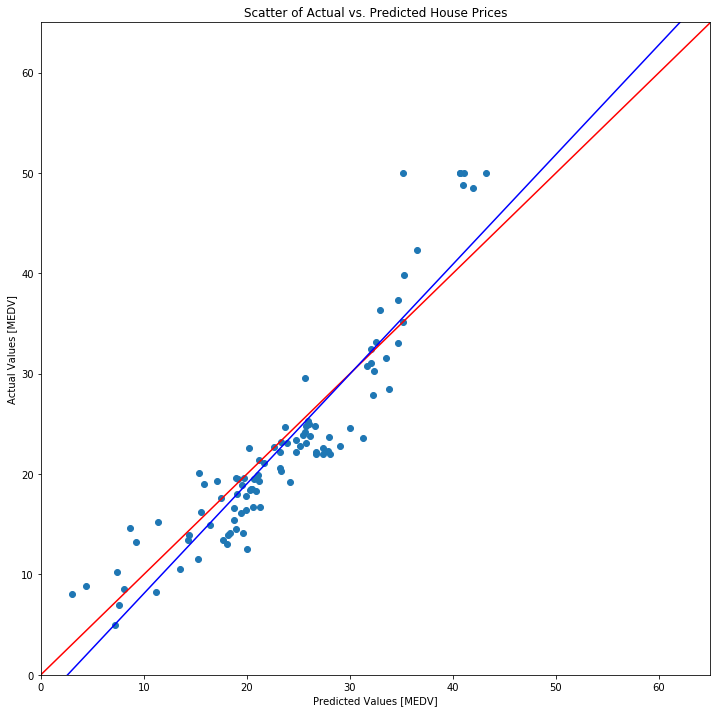

The r-squared value for this evaluation is:  0.851
The slope of the line in this evaluation is:  1.094
The y-intercept in this evaluation is;  -2.843


In [94]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets)

Note that the $r^2$ value is lower that for the sigmoid function - the correlation between the predicted values and actual values is not as good. Next we will consider the tanh function.

#### The hyperbolic tan activation function

As before we will create, compile and build the model, this time using the tanh activation function.

In [95]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='tanh', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='tanh'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='adam', loss='mean_squared_error')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 3ms/sample - loss: 554.0186
Epoch 2/1000
405/405 [==============================] - 0s 209us/sample - loss: 475.6535
Epoch 3/1000
405/405 [==============================] - 0s 222us/sample - loss: 373.7214
Epoch 4/1000
405/405 [==============================] - 0s 234us/sample - loss: 229.0664
Epoch 5/1000
405/405 [==============================] - 0s 266us/sample - loss: 114.1471
Epoch 6/1000
405/405 [==============================] - 0s 285us/sample - loss: 69.2327
Epoch 7/1000
405/405 [==============================] - 0s 307us/sample - loss: 55.4091
Epoch 8/1000
405/405 [==============================] - 0s 307us/sample - loss: 49.6224
Epoch 9/1000
405/405 [==============================] - 0s 299us/sample - loss: 46.7735
Epoch 10/1000
405/405 [==============================] - 0s 269us/sample - loss: 44.5142
Epoch 11/1000
405/405 [==============================] - 0s 217us/sample - loss: 42.7196
Epoch 12/1000
405/405 [====

405/405 [==============================] - 0s 197us/sample - loss: 5.9554
Epoch 94/1000
405/405 [==============================] - 0s 190us/sample - loss: 6.3036
Epoch 95/1000
405/405 [==============================] - 0s 189us/sample - loss: 5.8798
Epoch 96/1000
405/405 [==============================] - 0s 185us/sample - loss: 6.0158
Epoch 97/1000
405/405 [==============================] - 0s 183us/sample - loss: 5.7272
Epoch 98/1000
405/405 [==============================] - 0s 186us/sample - loss: 5.5695
Epoch 99/1000
405/405 [==============================] - 0s 187us/sample - loss: 5.5404
Epoch 100/1000
405/405 [==============================] - 0s 201us/sample - loss: 5.7357
Epoch 101/1000
405/405 [==============================] - 0s 199us/sample - loss: 5.3999
Epoch 102/1000
405/405 [==============================] - 0s 190us/sample - loss: 5.3434
Epoch 103/1000
405/405 [==============================] - 0s 185us/sample - loss: 5.3665
Epoch 104/1000
405/405 [==================

405/405 [==============================] - 0s 185us/sample - loss: 2.5747
Epoch 186/1000
405/405 [==============================] - 0s 191us/sample - loss: 2.6726
Epoch 187/1000
405/405 [==============================] - 0s 187us/sample - loss: 2.8541
Epoch 188/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.5222
Epoch 189/1000
405/405 [==============================] - 0s 194us/sample - loss: 2.4213
Epoch 190/1000
405/405 [==============================] - 0s 211us/sample - loss: 2.5909
Epoch 191/1000
405/405 [==============================] - 0s 220us/sample - loss: 2.5373
Epoch 192/1000
405/405 [==============================] - 0s 222us/sample - loss: 2.4460
Epoch 193/1000
405/405 [==============================] - 0s 223us/sample - loss: 2.4454
Epoch 194/1000
405/405 [==============================] - 0s 188us/sample - loss: 2.5037
Epoch 195/1000
405/405 [==============================] - 0s 196us/sample - loss: 2.4102
Epoch 196/1000
405/405 [============

405/405 [==============================] - 0s 193us/sample - loss: 1.4188
Epoch 278/1000
405/405 [==============================] - 0s 184us/sample - loss: 1.5781
Epoch 279/1000
405/405 [==============================] - 0s 181us/sample - loss: 1.3947
Epoch 280/1000
405/405 [==============================] - 0s 169us/sample - loss: 1.4292
Epoch 281/1000
405/405 [==============================] - 0s 184us/sample - loss: 1.3886
Epoch 282/1000
405/405 [==============================] - 0s 185us/sample - loss: 1.5892
Epoch 283/1000
405/405 [==============================] - 0s 189us/sample - loss: 1.3973
Epoch 284/1000
405/405 [==============================] - 0s 196us/sample - loss: 1.4210
Epoch 285/1000
405/405 [==============================] - 0s 203us/sample - loss: 1.3636
Epoch 286/1000
405/405 [==============================] - 0s 193us/sample - loss: 1.3008
Epoch 287/1000
405/405 [==============================] - 0s 185us/sample - loss: 1.3299
Epoch 288/1000
405/405 [============

405/405 [==============================] - 0s 195us/sample - loss: 0.8672
Epoch 370/1000
405/405 [==============================] - 0s 185us/sample - loss: 0.8878
Epoch 371/1000
405/405 [==============================] - 0s 187us/sample - loss: 0.7670
Epoch 372/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.7507
Epoch 373/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.7987
Epoch 374/1000
405/405 [==============================] - 0s 187us/sample - loss: 0.8180
Epoch 375/1000
405/405 [==============================] - 0s 181us/sample - loss: 0.7473
Epoch 376/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.7016
Epoch 377/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.7813
Epoch 378/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.7751
Epoch 379/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.7528
Epoch 380/1000
405/405 [============

405/405 [==============================] - 0s 188us/sample - loss: 0.4561
Epoch 462/1000
405/405 [==============================] - 0s 190us/sample - loss: 0.4220
Epoch 463/1000
405/405 [==============================] - 0s 185us/sample - loss: 0.4103
Epoch 464/1000
405/405 [==============================] - 0s 186us/sample - loss: 0.4512
Epoch 465/1000
405/405 [==============================] - 0s 182us/sample - loss: 0.4233
Epoch 466/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.4171
Epoch 467/1000
405/405 [==============================] - 0s 185us/sample - loss: 0.4251
Epoch 468/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.4458
Epoch 469/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.4171
Epoch 470/1000
405/405 [==============================] - 0s 192us/sample - loss: 0.4285
Epoch 471/1000
405/405 [==============================] - 0s 189us/sample - loss: 0.4315
Epoch 472/1000
405/405 [============

405/405 [==============================] - 0s 281us/sample - loss: 0.2221
Epoch 554/1000
405/405 [==============================] - 0s 251us/sample - loss: 0.2831
Epoch 555/1000
405/405 [==============================] - 0s 239us/sample - loss: 0.2372
Epoch 556/1000
405/405 [==============================] - 0s 243us/sample - loss: 0.2291
Epoch 557/1000
405/405 [==============================] - 0s 310us/sample - loss: 0.2048
Epoch 558/1000
405/405 [==============================] - 0s 304us/sample - loss: 0.1935
Epoch 559/1000
405/405 [==============================] - 0s 286us/sample - loss: 0.2337
Epoch 560/1000
405/405 [==============================] - 0s 282us/sample - loss: 0.2239
Epoch 561/1000
405/405 [==============================] - 0s 235us/sample - loss: 0.2553
Epoch 562/1000
405/405 [==============================] - 0s 205us/sample - loss: 0.2175
Epoch 563/1000
405/405 [==============================] - 0s 204us/sample - loss: 0.2215
Epoch 564/1000
405/405 [============

Epoch 645/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.1558
Epoch 646/1000
405/405 [==============================] - 0s 195us/sample - loss: 0.1465
Epoch 647/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.1499
Epoch 648/1000
405/405 [==============================] - 0s 192us/sample - loss: 0.1155
Epoch 649/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.1072
Epoch 650/1000
405/405 [==============================] - 0s 301us/sample - loss: 0.1050
Epoch 651/1000
405/405 [==============================] - 0s 316us/sample - loss: 0.1013
Epoch 652/1000
405/405 [==============================] - 0s 295us/sample - loss: 0.1199
Epoch 653/1000
405/405 [==============================] - 0s 295us/sample - loss: 0.0935
Epoch 654/1000
405/405 [==============================] - 0s 224us/sample - loss: 0.0914
Epoch 655/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.0736
Epoch 656/1000
405/40

405/405 [==============================] - 0s 209us/sample - loss: 0.0609
Epoch 738/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.0517
Epoch 739/1000
405/405 [==============================] - 0s 195us/sample - loss: 0.0574
Epoch 740/1000
405/405 [==============================] - 0s 222us/sample - loss: 0.0624
Epoch 741/1000
405/405 [==============================] - 0s 237us/sample - loss: 0.0744
Epoch 742/1000
405/405 [==============================] - 0s 228us/sample - loss: 0.0564
Epoch 743/1000
405/405 [==============================] - 0s 213us/sample - loss: 0.0611
Epoch 744/1000
405/405 [==============================] - 0s 215us/sample - loss: 0.0781
Epoch 745/1000
405/405 [==============================] - 0s 212us/sample - loss: 0.0881
Epoch 746/1000
405/405 [==============================] - 0s 202us/sample - loss: 0.0799
Epoch 747/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.0794
Epoch 748/1000
405/405 [============

405/405 [==============================] - 0s 296us/sample - loss: 0.0295
Epoch 830/1000
405/405 [==============================] - 0s 255us/sample - loss: 0.0365
Epoch 831/1000
405/405 [==============================] - 0s 236us/sample - loss: 0.0350
Epoch 832/1000
405/405 [==============================] - 0s 236us/sample - loss: 0.0310
Epoch 833/1000
405/405 [==============================] - 0s 263us/sample - loss: 0.0398
Epoch 834/1000
405/405 [==============================] - 0s 290us/sample - loss: 0.0385
Epoch 835/1000
405/405 [==============================] - 0s 278us/sample - loss: 0.0586
Epoch 836/1000
405/405 [==============================] - 0s 242us/sample - loss: 0.0727
Epoch 837/1000
405/405 [==============================] - 0s 227us/sample - loss: 0.0974
Epoch 838/1000
405/405 [==============================] - 0s 230us/sample - loss: 0.0944
Epoch 839/1000
405/405 [==============================] - 0s 240us/sample - loss: 0.0666
Epoch 840/1000
405/405 [============

405/405 [==============================] - 0s 237us/sample - loss: 0.0887
Epoch 921/1000
405/405 [==============================] - 0s 211us/sample - loss: 0.0818
Epoch 922/1000
405/405 [==============================] - 0s 205us/sample - loss: 0.0966
Epoch 923/1000
405/405 [==============================] - 0s 231us/sample - loss: 0.0682
Epoch 924/1000
405/405 [==============================] - 0s 228us/sample - loss: 0.0585
Epoch 925/1000
405/405 [==============================] - 0s 228us/sample - loss: 0.0352
Epoch 926/1000
405/405 [==============================] - 0s 244us/sample - loss: 0.0399
Epoch 927/1000
405/405 [==============================] - 0s 239us/sample - loss: 0.0422
Epoch 928/1000
405/405 [==============================] - 0s 208us/sample - loss: 0.0542
Epoch 929/1000
405/405 [==============================] - 0s 307us/sample - loss: 0.0405
Epoch 930/1000
405/405 [==============================] - 0s 320us/sample - loss: 0.0341
Epoch 931/1000
405/405 [============

The loss was quite low with this activation function - it was down under 1 after approx 300 epochs and continued to drop after that. Again we'll predict the values using the test data and plot these versus the actual values

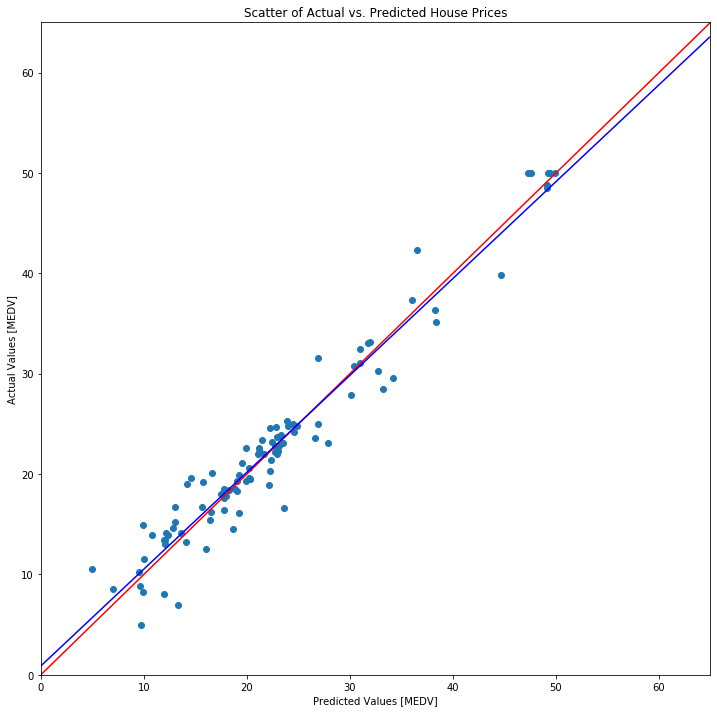

The r-squared value for this evaluation is:  0.943
The slope of the line in this evaluation is:  0.965
The y-intercept in this evaluation is;  0.879


In [96]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets)

This has performed as well as the sigmoid activation function, with a similar $r^2$ value and similar slope and intercept. This is to be expected as the tanh function and sigmoid function are actually quite similar. The tanh function might prove useful on this dataset as the loss was lower after fewer epochs - this could save some training time. Finally, we can test the relu activation function.

#### The rectified linear unit activation function

Finally we'll trial the rectified linear unit function. We'll follow the same procedure as before.

In [98]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='relu'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='adam', loss='mean_squared_error')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 3ms/sample - loss: 497.6023
Epoch 2/1000
405/405 [==============================] - 0s 209us/sample - loss: 241.6301
Epoch 3/1000
405/405 [==============================] - 0s 214us/sample - loss: 63.3266
Epoch 4/1000
405/405 [==============================] - 0s 209us/sample - loss: 33.5470
Epoch 5/1000
405/405 [==============================] - 0s 207us/sample - loss: 24.9670
Epoch 6/1000
405/405 [==============================] - 0s 209us/sample - loss: 21.4486
Epoch 7/1000
405/405 [==============================] - 0s 210us/sample - loss: 19.4593
Epoch 8/1000
405/405 [==============================] - 0s 215us/sample - loss: 18.2528
Epoch 9/1000
405/405 [==============================] - 0s 211us/sample - loss: 17.2577
Epoch 10/1000
405/405 [==============================] - 0s 208us/sample - loss: 16.5848
Epoch 11/1000
405/405 [==============================] - 0s 211us/sample - loss: 16.0014
Epoch 12/1000
405/405 [=======

405/405 [==============================] - 0s 202us/sample - loss: 5.5830
Epoch 94/1000
405/405 [==============================] - 0s 192us/sample - loss: 5.2948
Epoch 95/1000
405/405 [==============================] - 0s 189us/sample - loss: 5.1844
Epoch 96/1000
405/405 [==============================] - 0s 192us/sample - loss: 5.2631
Epoch 97/1000
405/405 [==============================] - 0s 191us/sample - loss: 5.1348
Epoch 98/1000
405/405 [==============================] - 0s 190us/sample - loss: 4.8300
Epoch 99/1000
405/405 [==============================] - 0s 195us/sample - loss: 4.6536
Epoch 100/1000
405/405 [==============================] - 0s 199us/sample - loss: 4.7122
Epoch 101/1000
405/405 [==============================] - 0s 197us/sample - loss: 4.8656
Epoch 102/1000
405/405 [==============================] - 0s 197us/sample - loss: 4.7046
Epoch 103/1000
405/405 [==============================] - 0s 196us/sample - loss: 4.7819
Epoch 104/1000
405/405 [==================

405/405 [==============================] - 0s 193us/sample - loss: 2.0710
Epoch 186/1000
405/405 [==============================] - 0s 194us/sample - loss: 2.1501
Epoch 187/1000
405/405 [==============================] - 0s 190us/sample - loss: 2.0946
Epoch 188/1000
405/405 [==============================] - 0s 189us/sample - loss: 2.1887
Epoch 189/1000
405/405 [==============================] - 0s 192us/sample - loss: 2.1197
Epoch 190/1000
405/405 [==============================] - 0s 187us/sample - loss: 1.8884
Epoch 191/1000
405/405 [==============================] - 0s 203us/sample - loss: 1.9441
Epoch 192/1000
405/405 [==============================] - 0s 196us/sample - loss: 2.0838
Epoch 193/1000
405/405 [==============================] - 0s 198us/sample - loss: 1.9292
Epoch 194/1000
405/405 [==============================] - 0s 192us/sample - loss: 2.1372
Epoch 195/1000
405/405 [==============================] - 0s 190us/sample - loss: 1.8874
Epoch 196/1000
405/405 [============

405/405 [==============================] - 0s 202us/sample - loss: 1.2079
Epoch 278/1000
405/405 [==============================] - 0s 202us/sample - loss: 1.1188
Epoch 279/1000
405/405 [==============================] - 0s 198us/sample - loss: 1.2239
Epoch 280/1000
405/405 [==============================] - 0s 202us/sample - loss: 1.1926
Epoch 281/1000
405/405 [==============================] - 0s 199us/sample - loss: 1.1833
Epoch 282/1000
405/405 [==============================] - 0s 200us/sample - loss: 1.0978
Epoch 283/1000
405/405 [==============================] - 0s 208us/sample - loss: 1.0330
Epoch 284/1000
405/405 [==============================] - 0s 201us/sample - loss: 1.0963
Epoch 285/1000
405/405 [==============================] - 0s 214us/sample - loss: 1.3331
Epoch 286/1000
405/405 [==============================] - 0s 195us/sample - loss: 1.1197
Epoch 287/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.1148
Epoch 288/1000
405/405 [============

405/405 [==============================] - 0s 203us/sample - loss: 0.7910
Epoch 370/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.8947
Epoch 371/1000
405/405 [==============================] - 0s 201us/sample - loss: 0.8483
Epoch 372/1000
405/405 [==============================] - 0s 188us/sample - loss: 0.6719
Epoch 373/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.7166
Epoch 374/1000
405/405 [==============================] - 0s 191us/sample - loss: 0.8009
Epoch 375/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.6836
Epoch 376/1000
405/405 [==============================] - 0s 201us/sample - loss: 0.8980
Epoch 377/1000
405/405 [==============================] - 0s 203us/sample - loss: 0.7581
Epoch 378/1000
405/405 [==============================] - 0s 191us/sample - loss: 0.7500
Epoch 379/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.7548
Epoch 380/1000
405/405 [============

405/405 [==============================] - 0s 199us/sample - loss: 0.5820
Epoch 462/1000
405/405 [==============================] - 0s 195us/sample - loss: 0.5497
Epoch 463/1000
405/405 [==============================] - 0s 187us/sample - loss: 0.4787
Epoch 464/1000
405/405 [==============================] - 0s 191us/sample - loss: 0.5164
Epoch 465/1000
405/405 [==============================] - 0s 191us/sample - loss: 0.5733
Epoch 466/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.6085
Epoch 467/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.7000
Epoch 468/1000
405/405 [==============================] - 0s 202us/sample - loss: 0.8697
Epoch 469/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.0243
Epoch 470/1000
405/405 [==============================] - 0s 194us/sample - loss: 0.7252
Epoch 471/1000
405/405 [==============================] - 0s 191us/sample - loss: 0.6255
Epoch 472/1000
405/405 [============

405/405 [==============================] - 0s 204us/sample - loss: 0.4676
Epoch 554/1000
405/405 [==============================] - 0s 196us/sample - loss: 0.5458
Epoch 555/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.4375
Epoch 556/1000
405/405 [==============================] - 0s 188us/sample - loss: 0.4644
Epoch 557/1000
405/405 [==============================] - 0s 194us/sample - loss: 0.4040
Epoch 558/1000
405/405 [==============================] - 0s 186us/sample - loss: 0.3998
Epoch 559/1000
405/405 [==============================] - 0s 220us/sample - loss: 0.4336
Epoch 560/1000
405/405 [==============================] - 0s 201us/sample - loss: 0.6050
Epoch 561/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.5702
Epoch 562/1000
405/405 [==============================] - 0s 196us/sample - loss: 0.4666
Epoch 563/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.4332
Epoch 564/1000
405/405 [============

405/405 [==============================] - 0s 203us/sample - loss: 0.5458
Epoch 646/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.5240
Epoch 647/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.4961
Epoch 648/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.4336
Epoch 649/1000
405/405 [==============================] - 0s 201us/sample - loss: 0.3564
Epoch 650/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.4127
Epoch 651/1000
405/405 [==============================] - 0s 203us/sample - loss: 0.3364
Epoch 652/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.3972
Epoch 653/1000
405/405 [==============================] - 0s 203us/sample - loss: 0.3285
Epoch 654/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.3479
Epoch 655/1000
405/405 [==============================] - 0s 196us/sample - loss: 0.3926
Epoch 656/1000
405/405 [============

405/405 [==============================] - 0s 197us/sample - loss: 0.2716
Epoch 738/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.2293
Epoch 739/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.2158
Epoch 740/1000
405/405 [==============================] - 0s 188us/sample - loss: 0.2243
Epoch 741/1000
405/405 [==============================] - 0s 189us/sample - loss: 0.4260
Epoch 742/1000
405/405 [==============================] - 0s 189us/sample - loss: 0.3015
Epoch 743/1000
405/405 [==============================] - 0s 192us/sample - loss: 0.2950
Epoch 744/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.2606
Epoch 745/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.2879
Epoch 746/1000
405/405 [==============================] - 0s 195us/sample - loss: 0.3081
Epoch 747/1000
405/405 [==============================] - 0s 188us/sample - loss: 0.2313
Epoch 748/1000
405/405 [============

405/405 [==============================] - 0s 201us/sample - loss: 0.1880
Epoch 830/1000
405/405 [==============================] - 0s 199us/sample - loss: 0.1429
Epoch 831/1000
405/405 [==============================] - 0s 188us/sample - loss: 0.1660
Epoch 832/1000
405/405 [==============================] - 0s 192us/sample - loss: 0.1353
Epoch 833/1000
405/405 [==============================] - 0s 192us/sample - loss: 0.1272
Epoch 834/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.1259
Epoch 835/1000
405/405 [==============================] - 0s 194us/sample - loss: 0.1648
Epoch 836/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.2478
Epoch 837/1000
405/405 [==============================] - 0s 195us/sample - loss: 0.2650
Epoch 838/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.4135
Epoch 839/1000
405/405 [==============================] - 0s 194us/sample - loss: 0.3974
Epoch 840/1000
405/405 [============

405/405 [==============================] - 0s 197us/sample - loss: 0.1769
Epoch 922/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.1789
Epoch 923/1000
405/405 [==============================] - 0s 190us/sample - loss: 0.2226
Epoch 924/1000
405/405 [==============================] - 0s 194us/sample - loss: 0.2043
Epoch 925/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.1740
Epoch 926/1000
405/405 [==============================] - 0s 219us/sample - loss: 0.1248
Epoch 927/1000
405/405 [==============================] - 0s 198us/sample - loss: 0.1414
Epoch 928/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.1525
Epoch 929/1000
405/405 [==============================] - 0s 197us/sample - loss: 0.2287
Epoch 930/1000
405/405 [==============================] - 0s 190us/sample - loss: 0.1959
Epoch 931/1000
405/405 [==============================] - 0s 200us/sample - loss: 0.2349
Epoch 932/1000
405/405 [============

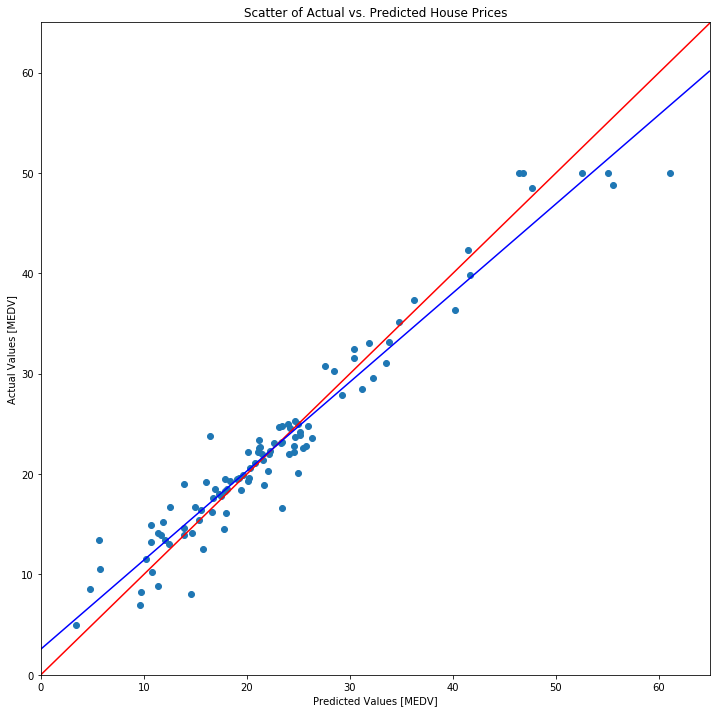

The r-squared value for this evaluation is:  0.939
The slope of the line in this evaluation is:  0.887
The y-intercept in this evaluation is;  2.555


In [99]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets)

The is a good correlation between the predicted and actual values using this activation function, however the best fit lit is not close to $y = x$.

#### Activation functions summary

The sigmoid and tanh activation functions provided better predictions that the linear and rectified linear unit function on this test data set. The tanh function was particularly good at reducing the loss function with less epochs.


#### Testing Different Optimisers

In this section we will use the sigmoid activation function from the first model, but we will experiment with some different optimisers. In the original model we used the 'adam' optimiser. There are 2 other that I would like to test:
1. Stochastic Gradient Descent, which was introduced to us during the course lectures
1. RMSprop, which I came across while working though a tensorflow tutorial

As with the activation functions we will rebuild and compile the model using these and determine if these improve the predictions.

#### Stochastic Gradient Descent (SGD)

First we re-build the model using the sigmoid activation function and 'SGD' optimiser. Then we retrain it with the training dataset.

In [100]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='sigmoid', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='sigmoid'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='sgd', loss='mean_squared_error')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/sample - loss: 85.8911
Epoch 2/1000
405/405 [==============================] - 0s 189us/sample - loss: 37.5903
Epoch 3/1000
405/405 [==============================] - 0s 190us/sample - loss: 26.4774
Epoch 4/1000
405/405 [==============================] - 0s 200us/sample - loss: 25.6614
Epoch 5/1000
405/405 [==============================] - 0s 201us/sample - loss: 25.2752
Epoch 6/1000
405/405 [==============================] - 0s 196us/sample - loss: 23.1589
Epoch 7/1000
405/405 [==============================] - 0s 191us/sample - loss: 21.4665
Epoch 8/1000
405/405 [==============================] - 0s 185us/sample - loss: 20.8867
Epoch 9/1000
405/405 [==============================] - 0s 193us/sample - loss: 22.3821
Epoch 10/1000
405/405 [==============================] - 0s 196us/sample - loss: 19.8986
Epoch 11/1000
405/405 [==============================] - 0s 190us/sample - loss: 20.0867
Epoch 12/1000
405/405 [=========

405/405 [==============================] - 0s 182us/sample - loss: 5.9403
Epoch 94/1000
405/405 [==============================] - 0s 168us/sample - loss: 5.9837
Epoch 95/1000
405/405 [==============================] - 0s 161us/sample - loss: 5.8530
Epoch 96/1000
405/405 [==============================] - 0s 158us/sample - loss: 5.8411
Epoch 97/1000
405/405 [==============================] - 0s 170us/sample - loss: 5.8908
Epoch 98/1000
405/405 [==============================] - 0s 168us/sample - loss: 5.7434
Epoch 99/1000
405/405 [==============================] - 0s 168us/sample - loss: 5.8414
Epoch 100/1000
405/405 [==============================] - 0s 191us/sample - loss: 5.5451
Epoch 101/1000
405/405 [==============================] - 0s 193us/sample - loss: 5.5542
Epoch 102/1000
405/405 [==============================] - 0s 178us/sample - loss: 5.4966
Epoch 103/1000
405/405 [==============================] - 0s 160us/sample - loss: 5.5527
Epoch 104/1000
405/405 [==================

405/405 [==============================] - 0s 244us/sample - loss: 3.4330
Epoch 186/1000
405/405 [==============================] - 0s 219us/sample - loss: 3.3036
Epoch 187/1000
405/405 [==============================] - 0s 214us/sample - loss: 3.3491
Epoch 188/1000
405/405 [==============================] - 0s 236us/sample - loss: 3.5832
Epoch 189/1000
405/405 [==============================] - 0s 196us/sample - loss: 3.3452
Epoch 190/1000
405/405 [==============================] - 0s 196us/sample - loss: 3.3896
Epoch 191/1000
405/405 [==============================] - 0s 205us/sample - loss: 3.2806
Epoch 192/1000
405/405 [==============================] - 0s 213us/sample - loss: 3.3352
Epoch 193/1000
405/405 [==============================] - 0s 243us/sample - loss: 3.2909
Epoch 194/1000
405/405 [==============================] - 0s 255us/sample - loss: 3.3457
Epoch 195/1000
405/405 [==============================] - 0s 240us/sample - loss: 3.4831
Epoch 196/1000
405/405 [============

405/405 [==============================] - 0s 185us/sample - loss: 2.4014
Epoch 278/1000
405/405 [==============================] - 0s 194us/sample - loss: 2.5175
Epoch 279/1000
405/405 [==============================] - 0s 169us/sample - loss: 2.4001
Epoch 280/1000
405/405 [==============================] - 0s 169us/sample - loss: 2.3614
Epoch 281/1000
405/405 [==============================] - 0s 196us/sample - loss: 2.5036
Epoch 282/1000
405/405 [==============================] - 0s 215us/sample - loss: 2.3298
Epoch 283/1000
405/405 [==============================] - 0s 212us/sample - loss: 2.4451
Epoch 284/1000
405/405 [==============================] - 0s 243us/sample - loss: 2.4084
Epoch 285/1000
405/405 [==============================] - 0s 234us/sample - loss: 2.4473
Epoch 286/1000
405/405 [==============================] - 0s 222us/sample - loss: 2.5533
Epoch 287/1000
405/405 [==============================] - 0s 228us/sample - loss: 2.8060
Epoch 288/1000
405/405 [============

405/405 [==============================] - 0s 208us/sample - loss: 1.9408
Epoch 370/1000
405/405 [==============================] - 0s 224us/sample - loss: 1.9705
Epoch 371/1000
405/405 [==============================] - 0s 207us/sample - loss: 1.9341
Epoch 372/1000
405/405 [==============================] - 0s 215us/sample - loss: 1.8705
Epoch 373/1000
405/405 [==============================] - 0s 197us/sample - loss: 1.9529
Epoch 374/1000
405/405 [==============================] - 0s 234us/sample - loss: 1.9586
Epoch 375/1000
405/405 [==============================] - 0s 215us/sample - loss: 2.0491
Epoch 376/1000
405/405 [==============================] - 0s 193us/sample - loss: 1.8922
Epoch 377/1000
405/405 [==============================] - 0s 204us/sample - loss: 1.9142
Epoch 378/1000
405/405 [==============================] - 0s 224us/sample - loss: 1.9545
Epoch 379/1000
405/405 [==============================] - 0s 200us/sample - loss: 1.8065
Epoch 380/1000
405/405 [============

405/405 [==============================] - 0s 219us/sample - loss: 1.5699
Epoch 462/1000
405/405 [==============================] - 0s 214us/sample - loss: 1.5296
Epoch 463/1000
405/405 [==============================] - 0s 223us/sample - loss: 1.5586
Epoch 464/1000
405/405 [==============================] - 0s 239us/sample - loss: 1.5718
Epoch 465/1000
405/405 [==============================] - 0s 218us/sample - loss: 1.5773
Epoch 466/1000
405/405 [==============================] - 0s 247us/sample - loss: 1.5232
Epoch 467/1000
405/405 [==============================] - 0s 234us/sample - loss: 1.6316
Epoch 468/1000
405/405 [==============================] - 0s 259us/sample - loss: 1.6027
Epoch 469/1000
405/405 [==============================] - 0s 235us/sample - loss: 1.5684
Epoch 470/1000
405/405 [==============================] - 0s 241us/sample - loss: 1.5317
Epoch 471/1000
405/405 [==============================] - 0s 234us/sample - loss: 1.5457
Epoch 472/1000
405/405 [============

405/405 [==============================] - 0s 248us/sample - loss: 1.2344
Epoch 554/1000
405/405 [==============================] - 0s 221us/sample - loss: 1.2949
Epoch 555/1000
405/405 [==============================] - 0s 208us/sample - loss: 1.3071
Epoch 556/1000
405/405 [==============================] - 0s 218us/sample - loss: 1.2966
Epoch 557/1000
405/405 [==============================] - 0s 192us/sample - loss: 1.2795
Epoch 558/1000
405/405 [==============================] - 0s 245us/sample - loss: 1.2293
Epoch 559/1000
405/405 [==============================] - 0s 239us/sample - loss: 1.2506
Epoch 560/1000
405/405 [==============================] - 0s 225us/sample - loss: 1.2173
Epoch 561/1000
405/405 [==============================] - 0s 205us/sample - loss: 1.2619
Epoch 562/1000
405/405 [==============================] - 0s 188us/sample - loss: 1.2378
Epoch 563/1000
405/405 [==============================] - 0s 237us/sample - loss: 1.2803
Epoch 564/1000
405/405 [============

405/405 [==============================] - 0s 442us/sample - loss: 1.0640
Epoch 646/1000
405/405 [==============================] - 0s 262us/sample - loss: 1.0741
Epoch 647/1000
405/405 [==============================] - 0s 520us/sample - loss: 1.0992
Epoch 648/1000
405/405 [==============================] - 0s 550us/sample - loss: 1.0666
Epoch 649/1000
405/405 [==============================] - 0s 375us/sample - loss: 1.0891
Epoch 650/1000
405/405 [==============================] - 0s 315us/sample - loss: 1.0612
Epoch 651/1000
405/405 [==============================] - 0s 471us/sample - loss: 1.0597
Epoch 652/1000
405/405 [==============================] - 0s 440us/sample - loss: 1.0294
Epoch 653/1000
405/405 [==============================] - 0s 368us/sample - loss: 1.0689
Epoch 654/1000
405/405 [==============================] - 0s 360us/sample - loss: 1.0258
Epoch 655/1000
405/405 [==============================] - 0s 286us/sample - loss: 1.0558
Epoch 656/1000
405/405 [============

405/405 [==============================] - 0s 206us/sample - loss: 0.8809
Epoch 738/1000
405/405 [==============================] - 0s 173us/sample - loss: 0.8867
Epoch 739/1000
405/405 [==============================] - 0s 167us/sample - loss: 0.8941
Epoch 740/1000
405/405 [==============================] - 0s 218us/sample - loss: 0.8421
Epoch 741/1000
405/405 [==============================] - 0s 241us/sample - loss: 0.8800
Epoch 742/1000
405/405 [==============================] - 0s 230us/sample - loss: 0.8923
Epoch 743/1000
405/405 [==============================] - 0s 210us/sample - loss: 0.8367
Epoch 744/1000
405/405 [==============================] - 0s 217us/sample - loss: 0.8885
Epoch 745/1000
405/405 [==============================] - 0s 213us/sample - loss: 0.8625
Epoch 746/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.8847
Epoch 747/1000
405/405 [==============================] - 0s 208us/sample - loss: 0.8815
Epoch 748/1000
405/405 [============

405/405 [==============================] - 0s 227us/sample - loss: 0.7089
Epoch 830/1000
405/405 [==============================] - 0s 208us/sample - loss: 0.7348
Epoch 831/1000
405/405 [==============================] - 0s 193us/sample - loss: 0.7889
Epoch 832/1000
405/405 [==============================] - 0s 202us/sample - loss: 0.7235
Epoch 833/1000
405/405 [==============================] - 0s 208us/sample - loss: 0.7363
Epoch 834/1000
405/405 [==============================] - 0s 300us/sample - loss: 0.7591
Epoch 835/1000
405/405 [==============================] - 0s 249us/sample - loss: 0.7465
Epoch 836/1000
405/405 [==============================] - 0s 250us/sample - loss: 0.7212
Epoch 837/1000
405/405 [==============================] - 0s 238us/sample - loss: 0.7419
Epoch 838/1000
405/405 [==============================] - 0s 221us/sample - loss: 0.7326
Epoch 839/1000
405/405 [==============================] - 0s 209us/sample - loss: 0.7280
Epoch 840/1000
405/405 [============

405/405 [==============================] - 0s 259us/sample - loss: 0.5869
Epoch 922/1000
405/405 [==============================] - 0s 245us/sample - loss: 0.6391
Epoch 923/1000
405/405 [==============================] - 0s 205us/sample - loss: 0.6563
Epoch 924/1000
405/405 [==============================] - 0s 234us/sample - loss: 0.5995
Epoch 925/1000
405/405 [==============================] - 0s 239us/sample - loss: 0.5889
Epoch 926/1000
405/405 [==============================] - 0s 218us/sample - loss: 0.6310
Epoch 927/1000
405/405 [==============================] - 0s 216us/sample - loss: 0.6059
Epoch 928/1000
405/405 [==============================] - 0s 210us/sample - loss: 0.5982
Epoch 929/1000
405/405 [==============================] - 0s 215us/sample - loss: 0.6017
Epoch 930/1000
405/405 [==============================] - 0s 211us/sample - loss: 0.6077
Epoch 931/1000
405/405 [==============================] - 0s 205us/sample - loss: 0.6056
Epoch 932/1000
405/405 [============

The optimiser did get the loss function to come down, but it was quite slow and took numerous epochs to get it close to 1. Next we will plot and evaluate.

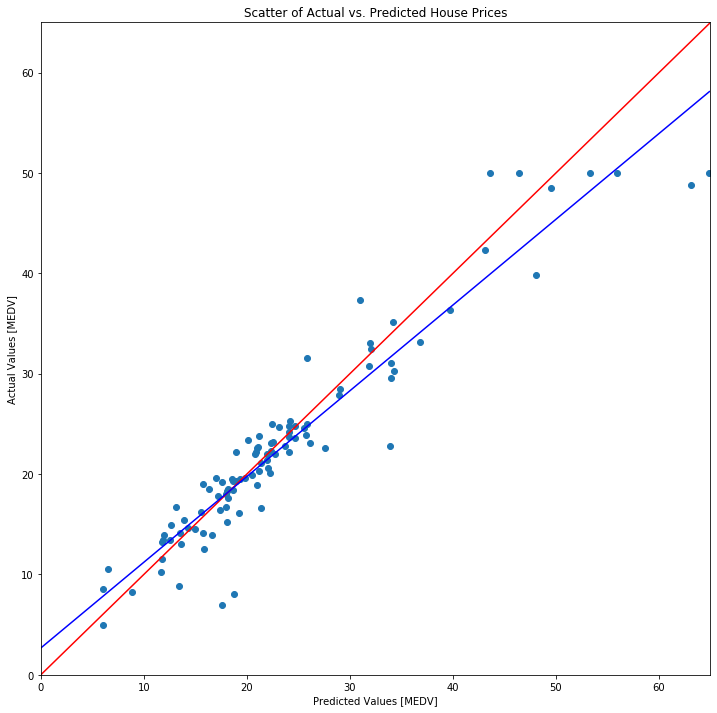

The r-squared value for this evaluation is:  0.901
The slope of the line in this evaluation is:  0.854
The y-intercept in this evaluation is;  2.672


In [101]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets)

The $r^2$ for the correlation is not as good as for the adam optimiser. Also the points are much more scatter at the extremes. For this reason I would suggest that the adam has performed better than the sgd optimser.

#### RMSProp optimiser

Finally we will rebuild and train the model using the RMSProp optimiser.

In [102]:
# this will be a sequential model - with layers added one at a time  
model = keras.models.Sequential()

# add the first hidden layer - including 64 neurons in this layer
# note the input shape is the lenght of the list of columns headers in the training dataset
model.add(keras.layers.Dense(64, activation='sigmoid', input_shape=[len(train_dataset.keys())]))
# add another hidden layer
model.add(keras.layers.Dense(64, activation='sigmoid'))
# define the one neuron in the output layer
model.add(keras.layers.Dense(1))

# compile the model define the loss function and optimiser
model.compile(optimizer='RMSProp', loss='mean_squared_error')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model.fit(normed_train_data, train_targets, epochs=EPOCHS, batch_size=10)

Epoch 1/1000
405/405 [==============================] - 1s 3ms/sample - loss: 477.7471
Epoch 2/1000
405/405 [==============================] - 0s 199us/sample - loss: 351.9367
Epoch 3/1000
405/405 [==============================] - 0s 207us/sample - loss: 281.2073
Epoch 4/1000
405/405 [==============================] - 0s 197us/sample - loss: 232.7046
Epoch 5/1000
405/405 [==============================] - 0s 215us/sample - loss: 193.7348
Epoch 6/1000
405/405 [==============================] - 0s 210us/sample - loss: 161.8803
Epoch 7/1000
405/405 [==============================] - 0s 202us/sample - loss: 132.6145
Epoch 8/1000
405/405 [==============================] - 0s 204us/sample - loss: 108.9058
Epoch 9/1000
405/405 [==============================] - 0s 233us/sample - loss: 90.6501
Epoch 10/1000
405/405 [==============================] - 0s 196us/sample - loss: 76.3481
Epoch 11/1000
405/405 [==============================] - 0s 203us/sample - loss: 66.6780
Epoch 12/1000
405/405 [=

405/405 [==============================] - 0s 185us/sample - loss: 12.4601
Epoch 94/1000
405/405 [==============================] - 0s 191us/sample - loss: 12.5696
Epoch 95/1000
405/405 [==============================] - 0s 177us/sample - loss: 12.5418
Epoch 96/1000
405/405 [==============================] - 0s 202us/sample - loss: 12.2498
Epoch 97/1000
405/405 [==============================] - 0s 179us/sample - loss: 12.0596
Epoch 98/1000
405/405 [==============================] - 0s 177us/sample - loss: 12.0539
Epoch 99/1000
405/405 [==============================] - 0s 183us/sample - loss: 12.1589
Epoch 100/1000
405/405 [==============================] - 0s 185us/sample - loss: 11.8588
Epoch 101/1000
405/405 [==============================] - 0s 187us/sample - loss: 11.8187
Epoch 102/1000
405/405 [==============================] - 0s 189us/sample - loss: 11.6889
Epoch 103/1000
405/405 [==============================] - 0s 176us/sample - loss: 11.6521
Epoch 104/1000
405/405 [=======

405/405 [==============================] - 0s 177us/sample - loss: 7.7919
Epoch 185/1000
405/405 [==============================] - 0s 188us/sample - loss: 7.6814
Epoch 186/1000
405/405 [==============================] - 0s 174us/sample - loss: 7.7391
Epoch 187/1000
405/405 [==============================] - 0s 180us/sample - loss: 7.7580
Epoch 188/1000
405/405 [==============================] - 0s 175us/sample - loss: 7.6794
Epoch 189/1000
405/405 [==============================] - 0s 175us/sample - loss: 7.6717
Epoch 190/1000
405/405 [==============================] - 0s 183us/sample - loss: 7.6986
Epoch 191/1000
405/405 [==============================] - 0s 180us/sample - loss: 7.5508
Epoch 192/1000
405/405 [==============================] - 0s 188us/sample - loss: 7.5849
Epoch 193/1000
405/405 [==============================] - 0s 192us/sample - loss: 7.2979
Epoch 194/1000
405/405 [==============================] - 0s 184us/sample - loss: 7.3765
Epoch 195/1000
405/405 [============

405/405 [==============================] - 0s 348us/sample - loss: 5.7943
Epoch 277/1000
405/405 [==============================] - 0s 242us/sample - loss: 5.8281
Epoch 278/1000
405/405 [==============================] - 0s 225us/sample - loss: 5.8511
Epoch 279/1000
405/405 [==============================] - 0s 234us/sample - loss: 5.9165
Epoch 280/1000
405/405 [==============================] - 0s 274us/sample - loss: 5.8075
Epoch 281/1000
405/405 [==============================] - 0s 288us/sample - loss: 5.7240
Epoch 282/1000
405/405 [==============================] - 0s 230us/sample - loss: 5.7515
Epoch 283/1000
405/405 [==============================] - 0s 268us/sample - loss: 5.7984
Epoch 284/1000
405/405 [==============================] - 0s 214us/sample - loss: 5.8202
Epoch 285/1000
405/405 [==============================] - 0s 217us/sample - loss: 5.7086
Epoch 286/1000
405/405 [==============================] - 0s 200us/sample - loss: 5.8504
Epoch 287/1000
405/405 [============

405/405 [==============================] - 0s 225us/sample - loss: 4.9818
Epoch 369/1000
405/405 [==============================] - 0s 275us/sample - loss: 5.1034
Epoch 370/1000
405/405 [==============================] - 0s 236us/sample - loss: 4.9095
Epoch 371/1000
405/405 [==============================] - 0s 229us/sample - loss: 5.0874
Epoch 372/1000
405/405 [==============================] - 0s 243us/sample - loss: 4.9157
Epoch 373/1000
405/405 [==============================] - 0s 273us/sample - loss: 5.0441
Epoch 374/1000
405/405 [==============================] - 0s 252us/sample - loss: 5.0303
Epoch 375/1000
405/405 [==============================] - 0s 225us/sample - loss: 4.9483
Epoch 376/1000
405/405 [==============================] - 0s 196us/sample - loss: 5.0712
Epoch 377/1000
405/405 [==============================] - 0s 211us/sample - loss: 4.9485
Epoch 378/1000
405/405 [==============================] - 0s 227us/sample - loss: 4.9591
Epoch 379/1000
405/405 [============

Epoch 460/1000
405/405 [==============================] - 0s 225us/sample - loss: 4.3589
Epoch 461/1000
405/405 [==============================] - 0s 223us/sample - loss: 4.3322
Epoch 462/1000
405/405 [==============================] - 0s 186us/sample - loss: 4.2553
Epoch 463/1000
405/405 [==============================] - 0s 219us/sample - loss: 4.2828
Epoch 464/1000
405/405 [==============================] - 0s 253us/sample - loss: 4.1681
Epoch 465/1000
405/405 [==============================] - 0s 238us/sample - loss: 4.1771
Epoch 466/1000
405/405 [==============================] - 0s 189us/sample - loss: 4.3059
Epoch 467/1000
405/405 [==============================] - 0s 201us/sample - loss: 4.2379
Epoch 468/1000
405/405 [==============================] - 0s 229us/sample - loss: 4.3154
Epoch 469/1000
405/405 [==============================] - 0s 209us/sample - loss: 4.2119
Epoch 470/1000
405/405 [==============================] - 0s 181us/sample - loss: 4.2453
Epoch 471/1000
405/40

405/405 [==============================] - 0s 179us/sample - loss: 3.7070
Epoch 553/1000
405/405 [==============================] - 0s 175us/sample - loss: 3.6054
Epoch 554/1000
405/405 [==============================] - 0s 186us/sample - loss: 3.5436
Epoch 555/1000
405/405 [==============================] - 0s 237us/sample - loss: 3.6069
Epoch 556/1000
405/405 [==============================] - 0s 234us/sample - loss: 3.5799
Epoch 557/1000
405/405 [==============================] - 0s 228us/sample - loss: 3.5625
Epoch 558/1000
405/405 [==============================] - 0s 236us/sample - loss: 3.4931
Epoch 559/1000
405/405 [==============================] - 0s 231us/sample - loss: 3.5394
Epoch 560/1000
405/405 [==============================] - 0s 215us/sample - loss: 3.6348
Epoch 561/1000
405/405 [==============================] - 0s 247us/sample - loss: 3.5627
Epoch 562/1000
405/405 [==============================] - 0s 243us/sample - loss: 3.5877
Epoch 563/1000
405/405 [============

405/405 [==============================] - 0s 183us/sample - loss: 3.0069
Epoch 645/1000
405/405 [==============================] - 0s 259us/sample - loss: 3.1042
Epoch 646/1000
405/405 [==============================] - 0s 239us/sample - loss: 2.9643
Epoch 647/1000
405/405 [==============================] - 0s 226us/sample - loss: 3.1003
Epoch 648/1000
405/405 [==============================] - 0s 209us/sample - loss: 3.0236
Epoch 649/1000
405/405 [==============================] - 0s 248us/sample - loss: 2.9910
Epoch 650/1000
405/405 [==============================] - 0s 217us/sample - loss: 3.0090
Epoch 651/1000
405/405 [==============================] - 0s 199us/sample - loss: 3.0474
Epoch 652/1000
405/405 [==============================] - 0s 178us/sample - loss: 2.9960
Epoch 653/1000
405/405 [==============================] - 0s 180us/sample - loss: 3.0832
Epoch 654/1000
405/405 [==============================] - 0s 166us/sample - loss: 2.9211
Epoch 655/1000
405/405 [============

405/405 [==============================] - 0s 238us/sample - loss: 2.6026
Epoch 737/1000
405/405 [==============================] - 0s 257us/sample - loss: 2.6527
Epoch 738/1000
405/405 [==============================] - 0s 205us/sample - loss: 2.5813
Epoch 739/1000
405/405 [==============================] - 0s 235us/sample - loss: 2.6618
Epoch 740/1000
405/405 [==============================] - 0s 237us/sample - loss: 2.6687
Epoch 741/1000
405/405 [==============================] - 0s 229us/sample - loss: 2.6395
Epoch 742/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.6775
Epoch 743/1000
405/405 [==============================] - 0s 191us/sample - loss: 2.6303
Epoch 744/1000
405/405 [==============================] - 0s 185us/sample - loss: 2.5539
Epoch 745/1000
405/405 [==============================] - 0s 181us/sample - loss: 2.5871
Epoch 746/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.6167
Epoch 747/1000
405/405 [============

405/405 [==============================] - 0s 231us/sample - loss: 2.3359
Epoch 829/1000
405/405 [==============================] - 0s 215us/sample - loss: 2.3317
Epoch 830/1000
405/405 [==============================] - 0s 250us/sample - loss: 2.2984
Epoch 831/1000
405/405 [==============================] - 0s 236us/sample - loss: 2.3026
Epoch 832/1000
405/405 [==============================] - 0s 226us/sample - loss: 2.3643
Epoch 833/1000
405/405 [==============================] - 0s 227us/sample - loss: 2.2822
Epoch 834/1000
405/405 [==============================] - 0s 234us/sample - loss: 2.2751
Epoch 835/1000
405/405 [==============================] - 0s 262us/sample - loss: 2.3872
Epoch 836/1000
405/405 [==============================] - 0s 237us/sample - loss: 2.3337
Epoch 837/1000
405/405 [==============================] - 0s 224us/sample - loss: 2.2894
Epoch 838/1000
405/405 [==============================] - 0s 218us/sample - loss: 2.2922
Epoch 839/1000
405/405 [============

405/405 [==============================] - 0s 207us/sample - loss: 2.1056
Epoch 921/1000
405/405 [==============================] - 0s 186us/sample - loss: 2.0725
Epoch 922/1000
405/405 [==============================] - 0s 190us/sample - loss: 2.0473
Epoch 923/1000
405/405 [==============================] - 0s 179us/sample - loss: 2.1196
Epoch 924/1000
405/405 [==============================] - 0s 181us/sample - loss: 2.0824
Epoch 925/1000
405/405 [==============================] - 0s 179us/sample - loss: 2.0357
Epoch 926/1000
405/405 [==============================] - 0s 183us/sample - loss: 2.0619
Epoch 927/1000
405/405 [==============================] - 0s 191us/sample - loss: 2.1014
Epoch 928/1000
405/405 [==============================] - 0s 194us/sample - loss: 2.0341
Epoch 929/1000
405/405 [==============================] - 0s 189us/sample - loss: 2.0389
Epoch 930/1000
405/405 [==============================] - 0s 178us/sample - loss: 2.0317
Epoch 931/1000
405/405 [============

Then we evaluate the impact of the RMSProp optimiser on the predictions.

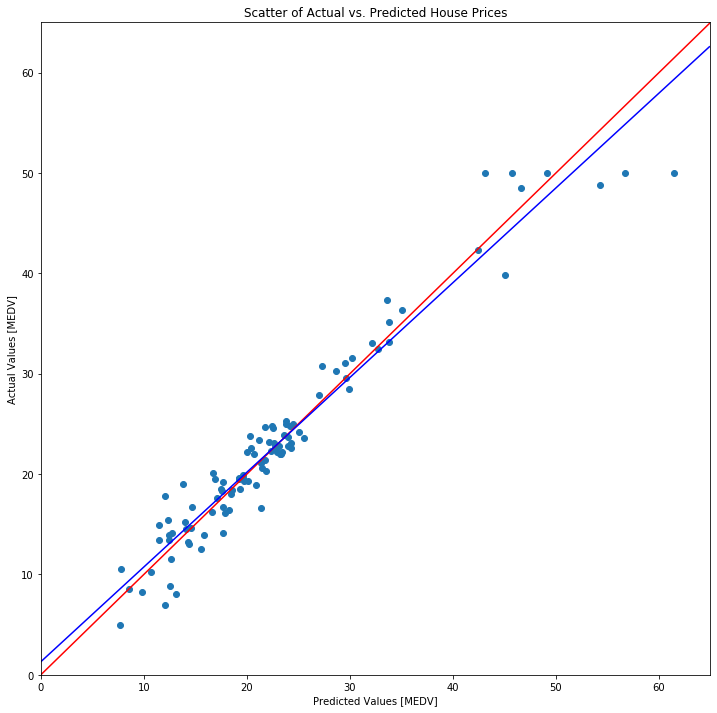

The r-squared value for this evaluation is:  0.938
The slope of the line in this evaluation is:  0.944
The y-intercept in this evaluation is;  1.3


In [103]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets)

The $r^2$ value is good, and the line is relatively good, however the model seems to be poor at predicting at for the higher values.

#### Summary of optimisers

Of the 3 optimisers tested - the adam optimiser seems to work best with this dataset.

**Change the shape of the model by adding more hidden layers.

**Change the shape of the model by modifying the number of neurons in each layer.

**Investigate the impact of the number of epochs on the loss functions

**Build a new model using only a subset of the data (In Section 1 were determined that LSTAT and RM were highly correlated to the MEDV)

# ** Note everything after this point is rough work and experimentation **

In [41]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_targets,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.634414,0.559585,0.634414,33.086278,3.286500,33.086277,995
996,0.755401,0.562803,0.755401,30.187942,3.151885,30.187941,996
997,0.660614,0.567667,0.660614,34.152524,3.315500,34.152523,997
998,0.752353,0.602657,0.752353,26.564517,3.093400,26.564520,998
999,0.756881,0.570467,0.756881,27.594789,2.947246,27.594790,999


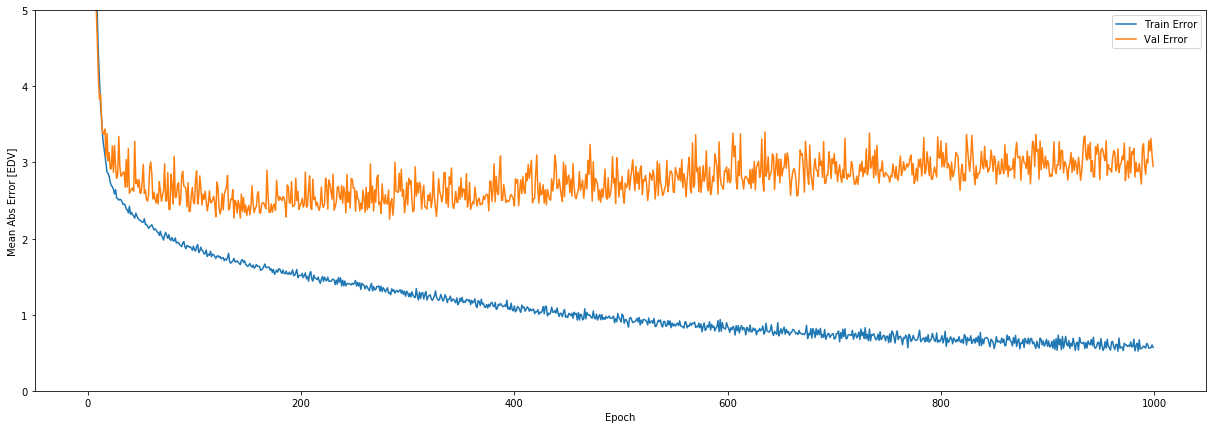

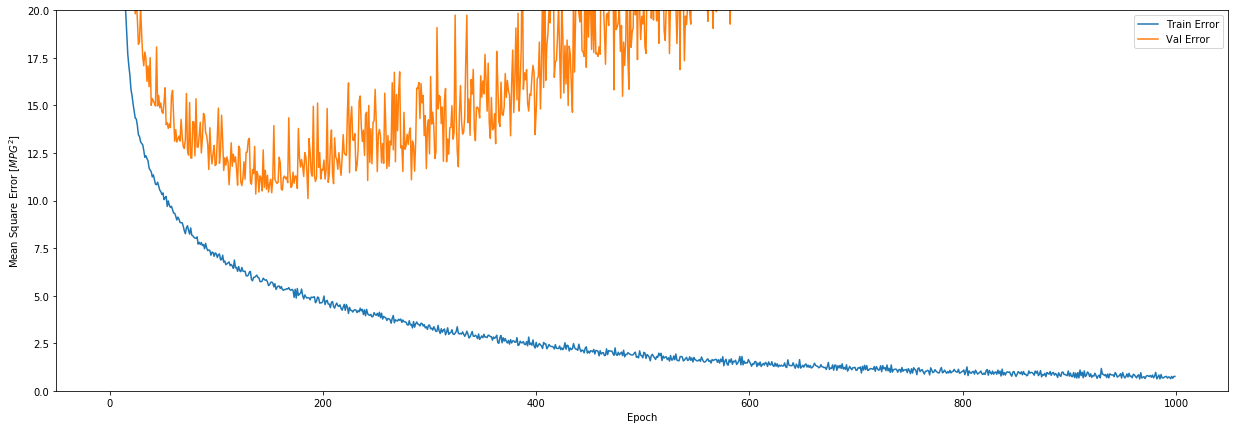

In [39]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [EDV]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)



....................................................................................................
.........

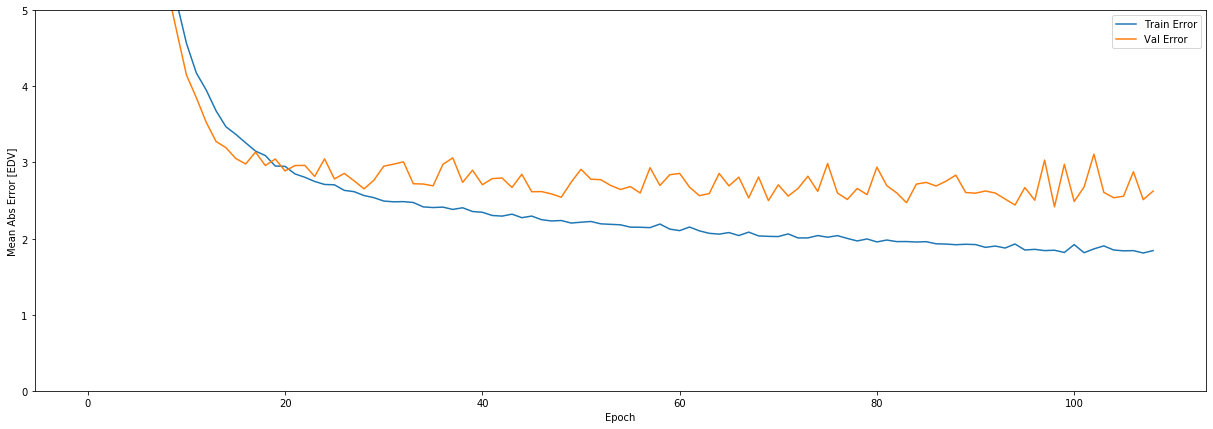

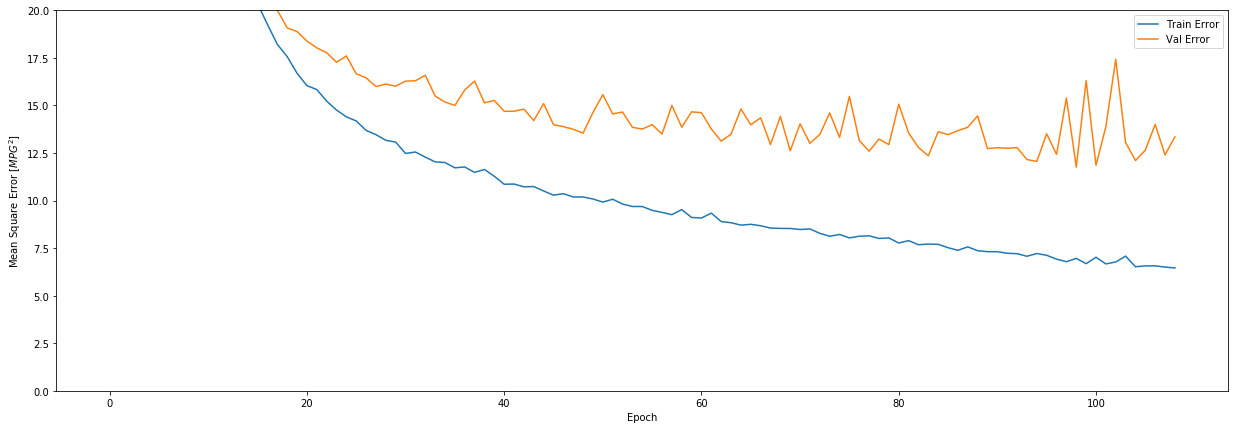

In [41]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_targets, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [49]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))


 - 0s - loss: 7.8433


TypeError: cannot unpack non-iterable numpy.float64 object

0.9391941239709698


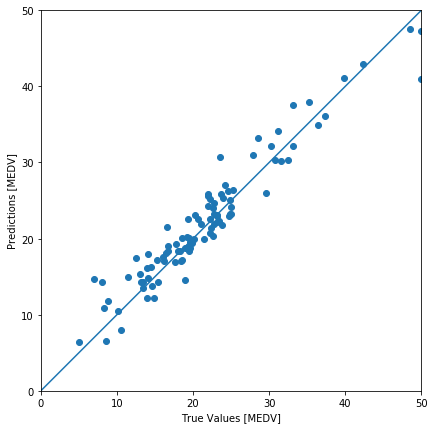

In [47]:
test_predictions = model.predict(normed_test_data).flatten()

slope, intercept, r_value, p_value, std_err = stats.linregress(test_targets, test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
print(r_value*r_value)

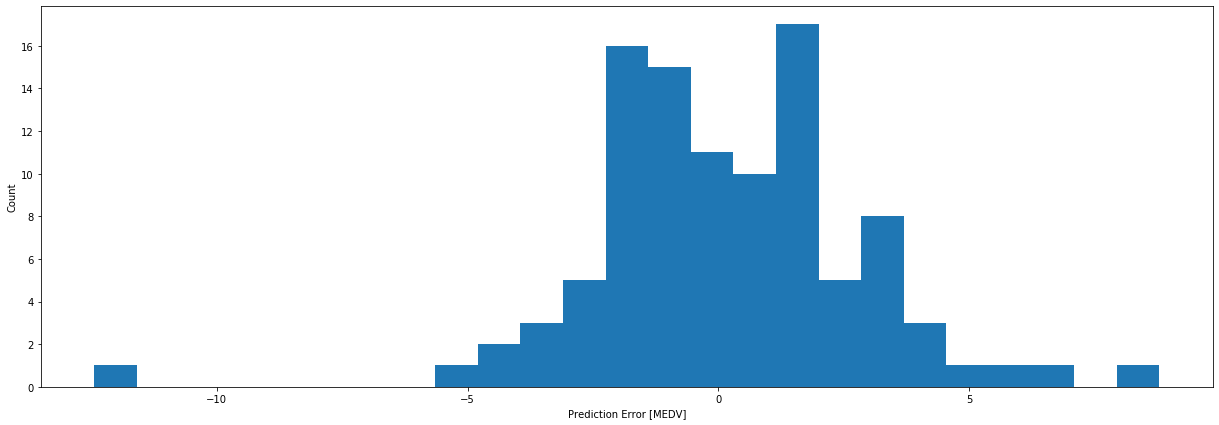

In [117]:
# plot the distrubution of error

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")


Try to retrain using just the inputs that are correlated to the output (RM and LSTAT). First create a new dataset

In [53]:
# create a new dataset using the data that was well correlated as shown in Section 1 above
df_new = df[['RM','LSTAT','MEDV']]

Then split out the testing and training data.

In [54]:
# select 80% of the dataset at random
train_dataset = df_new.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df_new.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["LSTAT"].count())
print("There are %d data points in the training set" % train_dataset["LSTAT"].count())
print("There are %d data points in the test set" % test_dataset["LSTAT"].count())

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


Split out the targets from the features, normalise the data

In [58]:
# pop the median values to new datasets
#train_targets = train_dataset.pop('MEDV')
#test_targets = test_dataset.pop('MEDV')

# create the training stats for the normalisation
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# redefine build model (train dataset shape )
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [59]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.04927803],
       [-0.03625404],
       [-0.01555735],
       [ 0.15714654],
       [-0.00701107],
       [-0.09620053],
       [-0.01764467],
       [-0.07572706],
       [ 0.08855993],
       [-0.00820049]], dtype=float32)

In [60]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_targets,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

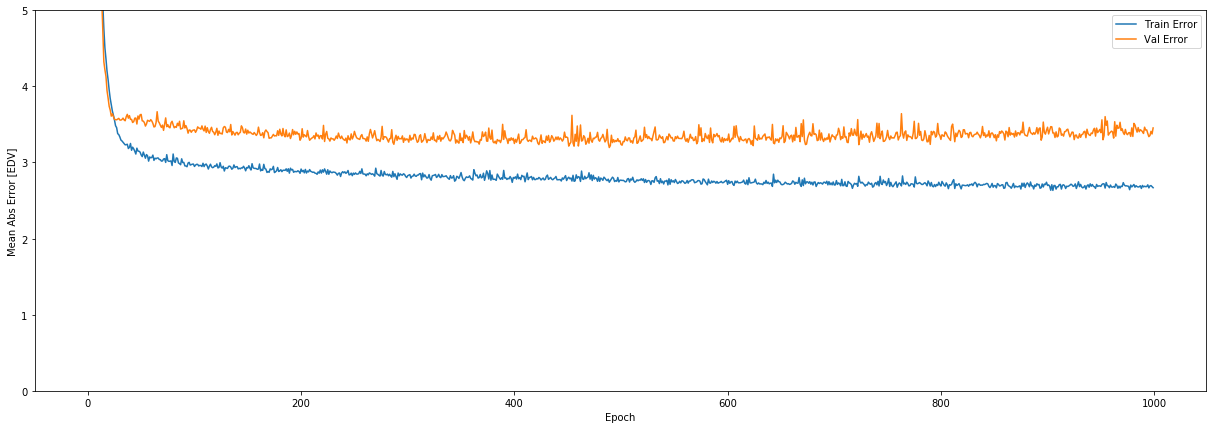

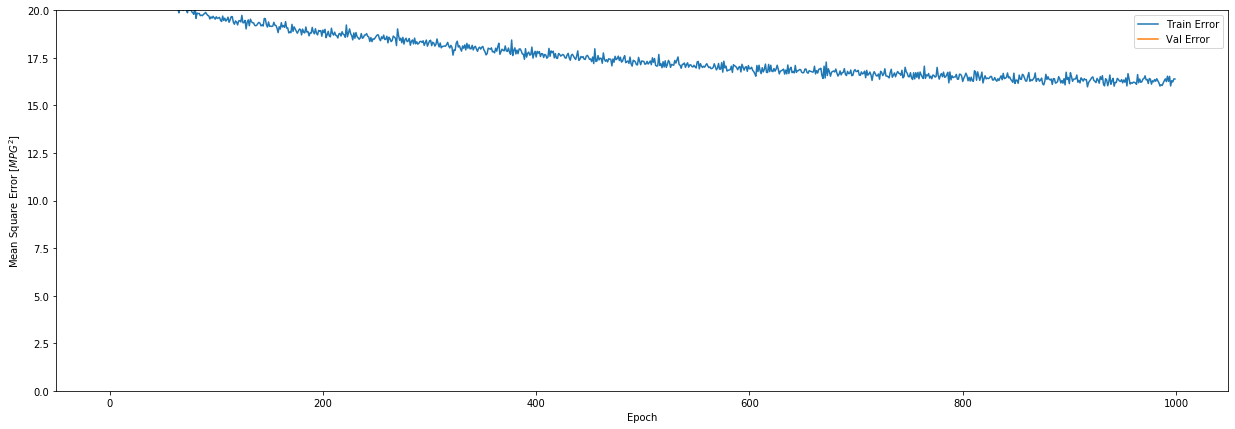

In [62]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [EDV]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


......................................

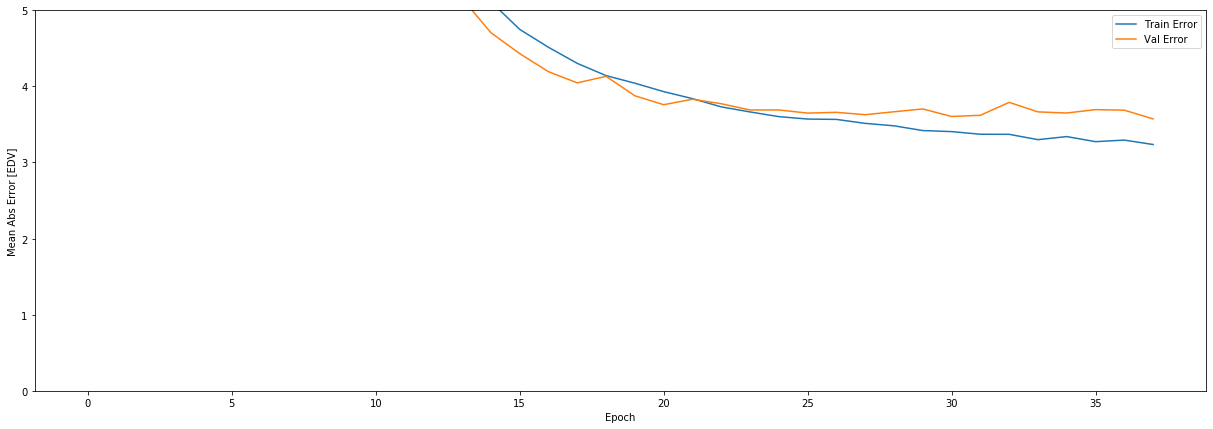

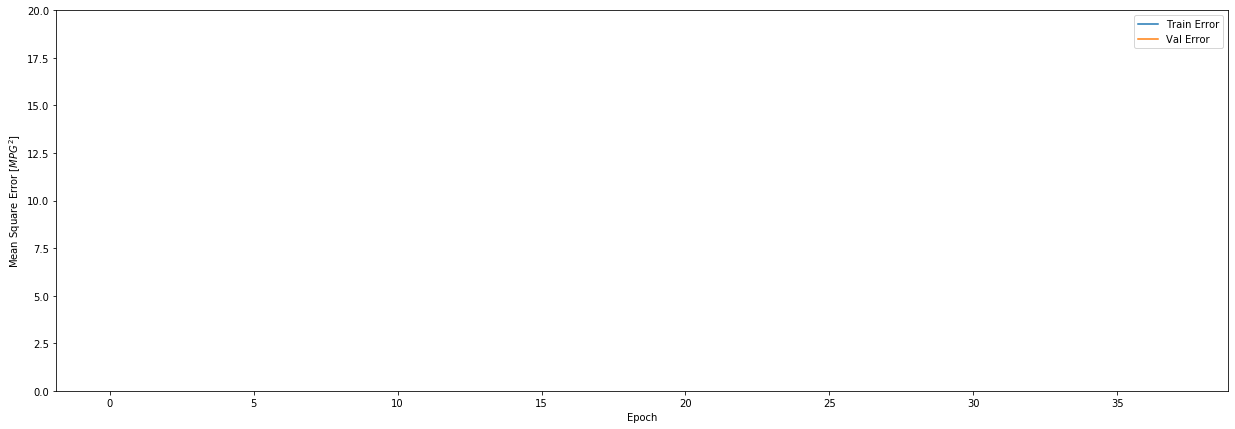

In [63]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_targets, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [64]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))


 - 0s - loss: 14.2035 - mean_absolute_error: 2.9141 - mean_squared_error: 14.2035
Testing set Mean Abs Error:  2.91 MEDV


0.8724316676101892


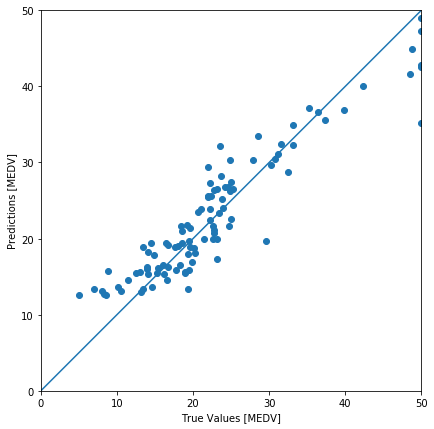

In [65]:
test_predictions = model.predict(normed_test_data).flatten()

slope, intercept, r_value, p_value, std_err = stats.linregress(test_targets, test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
print(r_value*r_value)

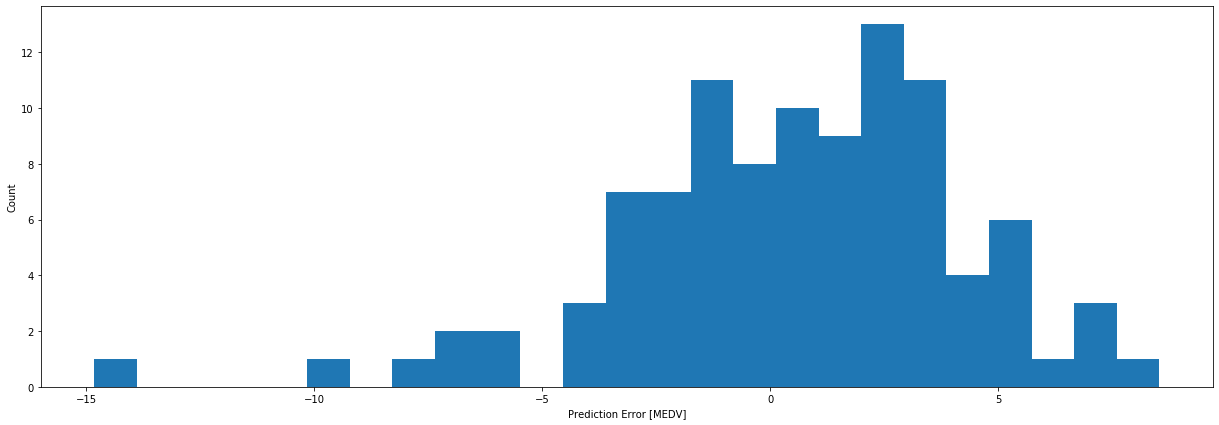

In [67]:
# plot the distrubution of error

error = test_predictions - test_targets
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

## 5. Conclusions

## References

1. [1] Project Jupyter. Project Jupyter Home. https://www.jupyter.org/
1. [2] University of Toronto. Boston Dataset. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. [3] Python Software Foundation. Welcome to python.org. https://www.python.org/
1. [4] SciPy developers. The scipy python package. https://www.scipy.org/
1. [5] Keras Team. Keras: The python deep learning library. https://keras.io/
1. [6] Hedonic Housing Prices and the Demand for Clean Air. Harrison and Rubinfield. 1978
1. [7] sklearn developers. The sklearn python package. https://scikit-learn.org/stable/.
1. [8] sklearn developers. Dataset loading. https://scikit-learn.org/stable/datasets/index.html
1. [9] Wikipedia. Pearson Correlation Coefficient. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
1. [10] Wikipedia. Ohm's Law. https://en.wikipedia.org/wiki/Ohm%27s_law
1. [11] www.towardsdatascience.com. Predicting Boston House Prices with Regression. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d  
1. [12] www.towardsdatascience.com. Linear Regression on Boston Housing Dataset. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
1. [13] Northwestern Unversity. Boston Home Values, across U.S. Census Tracts. https://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/Boston.htm  
1. [14] SciPy Developers. A simple regression analysis on the Boston housing data. https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html  
1. [15] Statistics How To. What is Inferential Statistics. https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
1. [16] Deborah J. Rumsey. Statistics for Dummies. Chapter 12 - Leaving Room for a Margin of Error. 
1. [17] www.stattrek.com. Hypothesis Test: Difference Between Means. https://stattrek.com/hypothesis-test/difference-in-means.aspx
1. [18] www.real-statistics.com. When t-test assumptions are violated. http://www.real-statistics.com/students-t-distribution/problems-data-t-tests/
1. [19] www.real-statistics.com. Non-parametric tests.http://www.real-statistics.com/non-parametric-tests/
1. [20] www.real-statistics.com. Wilcoxon Rank Sum test.http://www.real-statistics.com/non-parametric-tests/wilcoxon-rank-sum-test/
1. [21] SciPy developers. scipy.stats.ranksums. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html
1. [22] Tensorflow Developers. Basic regression: Predict fuel efficiency. https://www.tensorflow.org/tutorials/keras/regression
1. [23] www.geeksforgeeks.org. Introduction to Machine Learning. https://www.geeksforgeeks.org/introduction-machine-learning/
1. [24] Anmol Behl. An introduction to Machine Learning. https://becominghuman.ai/an-introduction-to-machine-learning-33a1b5d3a560
1. [25] Lisa Tagliaferri. An introduction to Machine Learning. https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning
1. [26] David Fumo. A Gentle Introduction to Neural Networks - Part 1.https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc
1. [27] Role of Bias in Neural Networks. https://intellipaat.com/community/253/role-of-bias-in-neural-networks
1. [28] Anish Singh Walia. Activation functions and it’s types-Which is better? .https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
1. [29] www.wikipedia.org. Sigmoid function. https://en.wikipedia.org/wiki/Sigmoid_function
1. [30] Keras. Optimizers - Keras. https://keras.io/optimizers/
1. [31] Wikipedia. Mean Squared Error. https://en.wikipedia.org/wiki/Mean_squared_error
1. [32] Keras. Usage of activations. https://keras.io/activations/

## End